# Test Protocol for the Benchmark Analysis | Genomic-Range GSA v 1.0

<br>

###  SHAURYA JAUHARI, ANTONIO MORA.

#### Date of first version: May 25th, 2020

#### Date of last review: June 9th, 2020

## Contents 

1. Summary/ Abstract
2. Installing Tool Packages
3. Installing Support Packages
4. Importing Data
5. Executing Chipenrich, Broadenrich, and Seq2pathway
6. Pruning Results from Chipenrich, Broadenrich, and Seq2pathway
7. Structuring Results from Enrichr and GREAT
8. Assembling Enrichment Terms for Diseases (Target) Pathways
9. Evaluating Performance of Tools and Comparing Results
10. Extending Comparison to Simulation Data
11. Reiterating the Protocol for Simulation Data

## Summary/ Abstract 

The Gene Set Analysis(GSA) Benchmarking Analysis is an effort to perform an evaluation of the enrichment tools for genomic regions, over defined metrics of sensitivity, specificity, precision, and prioritization. The idea for the benchmark analysis pipeline, is to ask from the user the path to the directory that holds data files constituting the benchmark data. This input is fed into the pipeline and the results (tool outputs, visualizations are engendered and stored on physical drive as well). 

Let us commence by instituting the work environment. The tools in question are **Chipenrich**, **Broadenrich**, **Seq2pathway**, **Enrichr**, and **GREAT**. We now install the tools and load their respective libraries. 

The following function code installs the R packages for Chipenrich, Broadenrich, and Seq2pathway. The tools *Enrichr* and *GREAT* are only available as web-interfaces and so the input-output for these have to be catered externally. 

## Installing Tool Packages

In [1]:
source("./protocolFunctions/installPackagesBenchmark.R")
installPackagesBenchmark()

Bioconductor version 3.11 (BiocManager 1.30.10), R 4.0.0 (2020-04-24)

Installing package(s) 'seq2pathway'




The downloaded binary packages are in
	/var/folders/hm/c3_fjypn62v5xh5b5ygv267m0000gn/T//RtmpdSehNa/downloaded_packages


Old packages: 'GO.db', 'IRanges', 'S4Vectors', 'backports', 'dbplyr', 'dplyr',
  'ellipsis', 'foreign', 'ggplot2', 'glue', 'httpuv', 'later', 'lubridate',
  'nlme', 'org.Dm.eg.db', 'org.Dr.eg.db', 'org.Hs.eg.db', 'org.Mm.eg.db',
  'org.Rn.eg.db', 'pkgload', 'polspline', 'rms', 'rversions', 'tidyr', 'vctrs',
  'xfun'

Bioconductor version 3.11 (BiocManager 1.30.10), R 4.0.0 (2020-04-24)

Installing package(s) 'chipenrich'




The downloaded binary packages are in
	/var/folders/hm/c3_fjypn62v5xh5b5ygv267m0000gn/T//RtmpdSehNa/downloaded_packages


Old packages: 'GO.db', 'IRanges', 'S4Vectors', 'backports', 'dbplyr', 'dplyr',
  'ellipsis', 'foreign', 'ggplot2', 'glue', 'httpuv', 'later', 'lubridate',
  'nlme', 'org.Dm.eg.db', 'org.Dr.eg.db', 'org.Hs.eg.db', 'org.Mm.eg.db',
  'org.Rn.eg.db', 'pkgload', 'polspline', 'rms', 'rversions', 'tidyr', 'vctrs',
  'xfun'













Warning message:
“'memory.size()' is Windows-specific”


[1] Inf

Now that we have all the R-based tools synced in, we shall now move towards assembling the test data. The BED files for the respective samples are available at a local folder. However, for the fuller version of the analysis pipeline I shall have the user input the path for the folder that holds the data files for the benchmark data.  

## Installing Support Packages

### Devtools

In [2]:
## 'devtools' provides multiple utilitarian functionalities. Let us install this package as well.

BiocManager::install('devtools')
library(devtools)

Bioconductor version 3.11 (BiocManager 1.30.10), R 4.0.0 (2020-04-24)

Installing package(s) 'devtools'




The downloaded binary packages are in
	/var/folders/hm/c3_fjypn62v5xh5b5ygv267m0000gn/T//RtmpdSehNa/downloaded_packages


Old packages: 'GO.db', 'IRanges', 'S4Vectors', 'backports', 'dbplyr', 'dplyr',
  'ellipsis', 'foreign', 'ggplot2', 'glue', 'httpuv', 'later', 'lubridate',
  'nlme', 'org.Dm.eg.db', 'org.Dr.eg.db', 'org.Hs.eg.db', 'org.Mm.eg.db',
  'org.Rn.eg.db', 'pkgload', 'polspline', 'rms', 'rversions', 'tidyr', 'vctrs',
  'xfun'

Loading required package: usethis



### GenomicRanges

In [3]:
BiocManager::install('GenomicRanges')
library(GenomicRanges)

Bioconductor version 3.11 (BiocManager 1.30.10), R 4.0.0 (2020-04-24)

Installing package(s) 'GenomicRanges'




The downloaded binary packages are in
	/var/folders/hm/c3_fjypn62v5xh5b5ygv267m0000gn/T//RtmpdSehNa/downloaded_packages


Old packages: 'GO.db', 'IRanges', 'S4Vectors', 'backports', 'dbplyr', 'dplyr',
  'ellipsis', 'foreign', 'ggplot2', 'glue', 'httpuv', 'later', 'lubridate',
  'nlme', 'org.Dm.eg.db', 'org.Dr.eg.db', 'org.Hs.eg.db', 'org.Mm.eg.db',
  'org.Rn.eg.db', 'pkgload', 'polspline', 'rms', 'rversions', 'tidyr', 'vctrs',
  'xfun'

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    Filter, Find, Map, Position, Reduce, anyDuplicated, append,
    as.data.frame, basename, cbind, colnames, dirname, do.call,
    duplicated, eval, evalq,

## Importing Data

The function **dataImportClean** solicits the directory path from the user that holds the constituent BED files for the benchmark dataset. The input (as depicted below) must be made as a character expression followed by a backslash. The files must have the fundamental attributes of a genomic region, viz. *chrom*, *start*, and *end*. The data is sourced as GRanges objects for subsequent manipulations. 

The dataset in question has the following profile, amongst other attributes. It is a mix of assorted diseases that act as our target pathways for a given instance of comparison of enrichment tools. (See https://doi.org/10.1371/journal.pone.0079217 for methodological reference) 

<img src="testData.png" width="800"/>

In [4]:
source("./protocolFunctions/dataImportClean.R")
dataImportClean("./testData/")

✔ Setting active project to '/Users/mei/Desktop/benchmarks'



The list variable 'samplesInBED' holds the data files. Let us look at the data.

In [5]:
samplesInBED <- readRDS("samplesInBED.rds")
ChIPSeqSamples <- readRDS("ChIPSeqSamples.rds")

In [6]:
ChIPSeqSamples

[1] "GSE84618"   "GSM1847178" "GSM2058021" "GSM2058022" "GSM2058023"
 [6] "GSM2101436" "GSM2101437" "GSM2101438" "GSM2101439" "GSM2298950"

In [7]:
samplesInBED

GRangesList object of length 10:
$GSE84618
GRanges object with 9789 ranges and 0 metadata columns:
         seqnames              ranges strand
            <Rle>           <IRanges>  <Rle>
     [1]     chr1 181153247-181153976      *
     [2]     chr1   54590230-54590888      *
     [3]     chr1 183400489-183400671      *
     [4]     chr1   55420208-55420369      *
     [5]     chr1   20114346-20114575      *
     ...      ...                 ...    ...
  [9785]     chrX   68346920-68347399      *
  [9786]     chrX   70474572-70474901      *
  [9787]     chrX   53105208-53105440      *
  [9788]     chrX   20065462-20065651      *
  [9789]     chrX   77395786-77395955      *
  -------
  seqinfo: 64 sequences from hg19 genome; no seqlengths

...
<9 more elements>

So, we see that we have 10 samples listed in GRanges format. These will be our input to the tools and the basis for comparison.

## Executing Chipenrich, Broadenrich, and Seq2pathway

While executing the following function we make an attempt to save the results as R objects and concurrently remove them from active memory for sufficiency. This wrapper script holds the executives for the three tools with specific parameters.

In [9]:
source("./protocolFunctions/executeChipenrichBroadenrichSeq2pathway.R")
executeChipenrichBroadenrichSeq2pathway("./testData/")

Reading peaks from ./testData/GSE84618.bed



[1] "python process start: 2020-01-06 09:38:53.071541"
[2] "Load Reference"                                  
[3] "Check Reference files"                           
[4] "fixed reference done: 2020-01-06 09:39:13.737955"
[5] "Start Annotation"                                
[6] "Finish Annotation"                               
[7] "python process end: 2020-01-06 09:39:16.400911"  
[1] "Start test.............."
[1] "Fisher's exact test done"


Reading peaks from ./testData/GSM1847178.bed



[1] "python process start: 2020-01-06 09:44:35.239472"
[2] "Load Reference"                                  
[3] "Check Reference files"                           
[4] "fixed reference done: 2020-01-06 09:44:55.212420"
[5] "Start Annotation"                                
[6] "Finish Annotation"                               
[7] "python process end: 2020-01-06 09:45:00.321482"  
[1] "Start test.............."
[1] "Fisher's exact test done"


Reading peaks from ./testData/GSM2058021.bed



[1] "python process start: 2020-01-06 09:51:59.340023"
[2] "Load Reference"                                  
[3] "Check Reference files"                           
[4] "fixed reference done: 2020-01-06 09:52:18.782591"
[5] "Start Annotation"                                
[6] "Finish Annotation"                               
[7] "python process end: 2020-01-06 09:52:46.553804"  
[1] "Start test.............."
[1] "Fisher's exact test done"


Reading peaks from ./testData/GSM2058022.bed



[1] "python process start: 2020-01-06 10:00:33.794035"
[2] "Load Reference"                                  
[3] "Check Reference files"                           
[4] "fixed reference done: 2020-01-06 10:00:53.341784"
[5] "Start Annotation"                                
[6] "Finish Annotation"                               
[7] "python process end: 2020-01-06 10:01:10.678266"  
[1] "Start test.............."
[1] "Fisher's exact test done"


Reading peaks from ./testData/GSM2058023.bed



[1] "python process start: 2020-01-06 10:09:00.015946"
[2] "Load Reference"                                  
[3] "Check Reference files"                           
[4] "fixed reference done: 2020-01-06 10:09:21.080501"
[5] "Start Annotation"                                
[6] "Finish Annotation"                               
[7] "python process end: 2020-01-06 10:09:48.216724"  
[1] "Start test.............."
[1] "Fisher's exact test done"


Reading peaks from ./testData/GSM2101436.bed



[1] "python process start: 2020-01-06 10:18:16.079567"
[2] "Load Reference"                                  
[3] "Check Reference files"                           
[4] "fixed reference done: 2020-01-06 10:18:36.549075"
[5] "Start Annotation"                                
[6] "Un_gl000224 Chromosome not registered"           
[7] "Finish Annotation"                               
[8] "python process end: 2020-01-06 10:18:36.646784"  
[1] "Start test.............."
[1] "Fisher's exact test done"


Reading peaks from ./testData/GSM2101437.bed



 [1] "python process start: 2020-01-06 10:20:51.431282"
 [2] "Load Reference"                                  
 [3] "Check Reference files"                           
 [4] "fixed reference done: 2020-01-06 10:21:11.415655"
 [5] "Start Annotation"                                
 [6] "1_gl000191_random Chromosome not registered"     
 [7] "1_gl000191_random Chromosome not registered"     
 [8] "1_gl000192_random Chromosome not registered"     
 [9] "1_gl000192_random Chromosome not registered"     
[10] "1_gl000192_random Chromosome not registered"     
[11] "1_gl000192_random Chromosome not registered"     
[12] "17_ctg5_hap1 Chromosome not registered"          
[13] "17_ctg5_hap1 Chromosome not registered"          
[14] "17_ctg5_hap1 Chromosome not registered"          
[15] "17_ctg5_hap1 Chromosome not registered"          
[16] "17_ctg5_hap1 Chromosome not registered"          
[17] "17_ctg5_hap1 Chromosome not registered"          
[18] "17_ctg5_hap1 Chromosome not registered"   

Reading peaks from ./testData/GSM2101438.bed



  [1] "python process start: 2020-01-06 10:29:31.210499"
  [2] "Load Reference"                                  
  [3] "Check Reference files"                           
  [4] "fixed reference done: 2020-01-06 10:29:51.426844"
  [5] "Start Annotation"                                
  [6] "17_gl000203_random Chromosome not registered"    
  [7] "17_gl000205_random Chromosome not registered"    
  [8] "17_gl000205_random Chromosome not registered"    
  [9] "17_gl000205_random Chromosome not registered"    
 [10] "17_gl000205_random Chromosome not registered"    
 [11] "17_gl000205_random Chromosome not registered"    
 [12] "17_gl000205_random Chromosome not registered"    
 [13] "17_gl000205_random Chromosome not registered"    
 [14] "17_gl000205_random Chromosome not registered"    
 [15] "17_gl000205_random Chromosome not registered"    
 [16] "17_gl000205_random Chromosome not registered"    
 [17] "17_gl000205_random Chromosome not registered"    
 [18] "17_gl000205_random Chrom

Reading peaks from ./testData/GSM2101439.bed



 [1] "python process start: 2020-01-06 10:33:07.770147"
 [2] "Load Reference"                                  
 [3] "Check Reference files"                           
 [4] "fixed reference done: 2020-01-06 10:33:28.521632"
 [5] "Start Annotation"                                
 [6] "17_ctg5_hap1 Chromosome not registered"          
 [7] "17_ctg5_hap1 Chromosome not registered"          
 [8] "17_ctg5_hap1 Chromosome not registered"          
 [9] "17_ctg5_hap1 Chromosome not registered"          
[10] "17_ctg5_hap1 Chromosome not registered"          
[11] "17_ctg5_hap1 Chromosome not registered"          
[12] "17_ctg5_hap1 Chromosome not registered"          
[13] "17_ctg5_hap1 Chromosome not registered"          
[14] "17_ctg5_hap1 Chromosome not registered"          
[15] "17_ctg5_hap1 Chromosome not registered"          
[16] "17_ctg5_hap1 Chromosome not registered"          
[17] "17_ctg5_hap1 Chromosome not registered"          
[18] "17_ctg5_hap1 Chromosome not registered"   

Reading peaks from ./testData/GSM2298950.bed



[1] "python process start: 2020-01-06 10:38:38.928283"
[2] "Load Reference"                                  
[3] "Check Reference files"                           
[4] "fixed reference done: 2020-01-06 10:38:58.284831"
[5] "Start Annotation"                                
[6] "Finish Annotation"                               
[7] "python process end: 2020-01-06 10:38:58.445859"  
[1] "Start test.............."
[1] "Fisher's exact test done"


Reading peaks from ./testData/GSE84618.bed

Assigning peaks to genes with assign_peaks(...) ..

Test: ChIP-Enrich

Genesets: Gene Ontology Biological Process

Running tests..

Test: ChIP-Enrich

Genesets: Gene Ontology Cellular Component

Running tests..

Test: ChIP-Enrich

Genesets: Gene Ontology Molecular Function

Running tests..

Test: ChIP-Enrich

Genesets: KEGG Pathways

Running tests..

Reading peaks from ./testData/GSM1847178.bed

Assigning peaks to genes with assign_peaks(...) ..

Test: ChIP-Enrich

Genesets: Gene Ontology Biological Process

Running tests..

Test: ChIP-Enrich

Genesets: Gene Ontology Cellular Component

Running tests..

Test: ChIP-Enrich

Genesets: Gene Ontology Molecular Function

Running tests..

Test: ChIP-Enrich

Genesets: KEGG Pathways

Running tests..

Reading peaks from ./testData/GSM2058021.bed

Assigning peaks to genes with assign_peaks(...) ..

Test: ChIP-Enrich

Genesets: Gene Ontology Biological Process

Running tests..

Applying correction for ge

Applying correction for geneset GO:0051973 with 35 genes...

Applying correction for geneset GO:0052126 with 35 genes...

Applying correction for geneset GO:0052192 with 35 genes...

Applying correction for geneset GO:0060049 with 19 genes...

Applying correction for geneset GO:0060390 with 16 genes...

Applying correction for geneset GO:0060544 with 20 genes...

Applying correction for geneset GO:0061157 with 19 genes...

Applying correction for geneset GO:0070200 with 15 genes...

Applying correction for geneset GO:0070242 with 16 genes...

Applying correction for geneset GO:0070584 with 20 genes...

Applying correction for geneset GO:0070828 with 15 genes...

Applying correction for geneset GO:0070987 with 19 genes...

Applying correction for geneset GO:0071173 with 29 genes...

Applying correction for geneset GO:0071174 with 29 genes...

Applying correction for geneset GO:0071294 with 18 genes...

Applying correction for geneset GO:0071459 with 19 genes...

Applying correction for 

Applying correction for geneset hsa00532 with 22 genes...

Applying correction for geneset hsa03410 with 33 genes...

Applying correction for geneset hsa03430 with 23 genes...

Applying correction for geneset hsa04710 with 22 genes...

Applying correction for geneset hsa05213 with 52 genes...

Reading peaks from ./testData/GSM2058022.bed

Assigning peaks to genes with assign_peaks(...) ..

Test: ChIP-Enrich

Genesets: Gene Ontology Biological Process

Running tests..

Applying correction for geneset GO:0000028 with 15 genes...

Applying correction for geneset GO:0000042 with 18 genes...

Applying correction for geneset GO:0000289 with 34 genes...

Applying correction for geneset GO:0002183 with 22 genes...

Applying correction for geneset GO:0002190 with 15 genes...

Applying correction for geneset GO:0006098 with 18 genes...

Applying correction for geneset GO:0006144 with 20 genes...

Applying correction for geneset GO:0006271 with 16 genes...

Applying correction for geneset GO:0006

Applying correction for geneset GO:0019372 with 15 genes...

Applying correction for geneset GO:0019682 with 23 genes...

Applying correction for geneset GO:0021756 with 16 genes...

Applying correction for geneset GO:0030277 with 16 genes...

Applying correction for geneset GO:0031112 with 23 genes...

Applying correction for geneset GO:0031116 with 20 genes...

Applying correction for geneset GO:0031293 with 16 genes...

Applying correction for geneset GO:0031440 with 20 genes...

Applying correction for geneset GO:0032469 with 21 genes...

Applying correction for geneset GO:0032516 with 15 genes...

Applying correction for geneset GO:0032786 with 23 genes...

Applying correction for geneset GO:0032878 with 22 genes...

Applying correction for geneset GO:0032922 with 55 genes...

Applying correction for geneset GO:0033119 with 25 genes...

Applying correction for geneset GO:0033522 with 19 genes...

Applying correction for geneset GO:0033866 with 16 genes...

Applying correction for 

Applying correction for geneset GO:0002756 with 33 genes...

Applying correction for geneset GO:0003222 with 16 genes...

Applying correction for geneset GO:0006388 with 15 genes...

Applying correction for geneset GO:0006743 with 16 genes...

Applying correction for geneset GO:0006744 with 15 genes...

Applying correction for geneset GO:0031958 with 17 genes...

Applying correction for geneset GO:0032011 with 16 genes...

Applying correction for geneset GO:0032012 with 16 genes...

Applying correction for geneset GO:0032469 with 21 genes...

Applying correction for geneset GO:0033866 with 16 genes...

Applying correction for geneset GO:0034030 with 16 genes...

Applying correction for geneset GO:0034033 with 16 genes...

Applying correction for geneset GO:0034315 with 16 genes...

Applying correction for geneset GO:0034453 with 18 genes...

Applying correction for geneset GO:0035561 with 21 genes...

Applying correction for geneset GO:0035635 with 18 genes...

Applying correction for 

Genesets: Gene Ontology Cellular Component

Running tests..

Test: Broad-Enrich

Genesets: Gene Ontology Molecular Function

Running tests..

Test: Broad-Enrich

Genesets: KEGG Pathways

Running tests..

Reading peaks from ./testData/GSM2101439.bed

Assigning peaks to genes with assign_peak_segments(...) ..

Calculating peak overlaps with gene loci..

Test: Broad-Enrich

Genesets: Gene Ontology Biological Process

Running tests..

Test: Broad-Enrich

Genesets: Gene Ontology Cellular Component

Running tests..

Test: Broad-Enrich

Genesets: Gene Ontology Molecular Function

Running tests..

Test: Broad-Enrich

Genesets: KEGG Pathways

Running tests..

Reading peaks from ./testData/GSM2298950.bed

Assigning peaks to genes with assign_peak_segments(...) ..

Calculating peak overlaps with gene loci..

Test: Broad-Enrich

Genesets: Gene Ontology Biological Process

Running tests..

Test: Broad-Enrich

Genesets: Gene Ontology Cellular Component

Running tests..

Test: Broad-Enrich

Genesets:

## Pruning Results from Chipenrich, Broadenrich, and Seq2pathway

Since we shall majorly be interested in the enrichment terms and their statistical significance values, we'll extract these from the other attributes of the results from the tools.

In [30]:
source("./protocolFunctions/extractingValuedResults.R")
extractingValuedResults()

Now that we have the results from Chipenrich, Broadenrich, and Seq2pathway, we move towards framing results from Enrichr and GREAT that we have manually compiled. Just to reiterate, both the tools are available as a web-interface as of now. (GREAT: http://bejerano.stanford.edu/great/public/html/index.php, Enrichr: http://amp.pharm.mssm.edu/Enrichr/)

## Structuring Results from Enrichr and GREAT

### Enrichr

In [2]:
source("./protocolFunctions/enrichrResultsCompilation.R")
enrichrResultsCompilation()

At this point, we have compiled results from different databases of Enrichr, viz. GO : Cellular Component, Molecular Function, Biological Process, and KEGG. For computational convenience, we shall combine all these results together for each sample in our benchmark dataset. Another task to perform here is to extract GO and KEGG ids from the enrichment terms. The results contain merged information and we prune the term definition.

In [8]:
source("./protocolFunctions/enrichrPostprocessing.R")
enrichrPostprocessing()

### GREAT

The following function will pick up the results from a local directory (as results from GREAT have to be manually curated) and restructure them to align with the current analysis. Disclaimer: The results from different GO heads in GREAT (CC, MF, BP) have been assembled into a single file for each sample.

In [4]:
source("./protocolFunctions/greatResultsCompilation.R")
greatResultsCompilation()

Bioconductor version 3.9 (BiocManager 1.30.10), R 3.6.0 (2019-04-26)

Installing package(s) 'GO.db'

installing the source package ‘GO.db’




## Assembling Enrichment Terms for Diseases (Target) Pathways

Now that we have the results from all the tools, we shall proceed towards comparing the tools for their efficacy in pathway analysis. But the means to compare has to be assembled first. The output from tools have been restructured and amongst other data, we've managed to pull out the two entities that fuel the downstream analysis: *enrichment terms*, and *p-value*.

These results are due on validation from the actual enrichment terms associated with the disease (target) pathways that are a part of the benchmark dataset. To accomplish that, we are going to call our manually curated enrichment terms corresponding to four diseases (Gastric Cancer, Prostate Cancer, Alzheimers Disease, and Colorectal Cancer), used in this test case. 

For KEGG terms affiliated with the said disease, we shall manually curate the KEGG terms associated with the diseases and use them for reference. The idea is to save the KEGG terms for the disease pathway as well as their subpathways. This information can be sourced from the KEGG webpage.

We shall now pool both GO and KEGG terms together for every disease to gain a consolidated list of actual enrichment terms. (See function definition)

In [8]:
source("./protocolFunctions/diseaseTerms.R")
diseaseTerms()

The individual disease enrichment terms are as follows:

In [9]:
readRDS("colorectalCancerPool")

[1] "GO:0097259" "GO:0045517" "GO:0045544" "GO:0030876" "GO:0004501"
  [6] "GO:0042015" "GO:0042016" "GO:0042237" "GO:0072618" "GO:0032624"
 [11] "GO:0032664" "GO:0050051" "GO:0050052" "GO:0045387" "GO:0045389"
 [16] "GO:0045388" "GO:0036392" "GO:0032704" "GO:0032744" "GO:0097258"
 [21] "GO:0052635" "GO:0102245" "GO:1903885" "GO:1903886" "GO:1903884"
 [26] "GO:1900579" "GO:1900580" "GO:1900581" "GO:1901947" "GO:1901949"
 [31] "GO:1901948" "GO:0047006" "GO:0036203" "GO:0050638" "GO:0050598"
 [36] "GO:0005641" "GO:0004110" "GO:0035274" "GO:0050597" "GO:0035574"
 [41] "GO:0009311" "GO:0009420" "GO:0033704" "GO:0033703" "GO:0102353"
 [46] "GO:0034773" "GO:0034772" "GO:0034771" "GO:0042799" "GO:0035575"
 [51] "GO:0052869" "GO:0070918" "GO:0042382" "GO:0070512" "GO:0070510"
 [56] "GO:0070492" "GO:0030046" "GO:0004661" "GO:1990889" "GO:0031050"
 [61] "GO:0009312" "GO:0009313" "GO:0016607" "GO:0097518" "GO:0097414"
 [66] "GO:0050604" "GO:0051691" "GO:0051502" "GO:1990029" "GO:0035078"
 [71] "GO:0034770" "GO:0016707" "GO:0043818" "GO:0047086" "GO:0009275"
 [76] "GO:0008386" "GO:0098788" "GO:0070012" "GO:0019369" "GO:0044461"
 [81] "GO:0030084" "GO:0030257" "GO:0070511" "GO:0098017" "GO:0098018"
 [86] "GO:0005635" "GO:0035672" "GO:0035673" "GO:0016443" "GO:0044199"
 [91] "GO:0010207" "GO:0039617" "GO:0050544" "GO:0051692" "GO:0090374"
 [96] "GO:1990040" "GO:0035100" "GO:0035077" "GO:0005518" "GO:0030169"
[101] "GO:0032963" "GO:0032964" "GO:0034361" "GO:0044176" "GO:0019030"
[106] "GO:0039618" "GO:0051501" "GO:0075526" "GO:0090088" "GO:0001745"
[111] "GO:0015772" "GO:0006857" "GO:0034189" "GO:0015334" "GO:0043781"
[116] "GO:0047044" "GO:0030119" "GO:0022894" "GO:0034362" "GO:0016286"
[121] "GO:0035061" "GO:0034709" "GO:0047442" "GO:0047024" "GO:0004508"
[126] "hsa05210"   "hsa04310"   "hsa04110"   "hsa04210"   "hsa04115"  
[131] "hsa04151"   "hsa04010"   "hsa04350"   "hsa04012"   "hsa04150"

In [10]:
readRDS("gastricCancerPool")

[1] "GO:0035483" "GO:0035482" "GO:0120060" "GO:1990768" "GO:0001696"
 [6] "GO:1905333" "GO:0120061" "GO:0120062" "GO:0016519" "GO:0038192"
[11] "GO:0001699" "GO:0001698" "GO:0001697" "GO:0031767" "GO:0060453"
[16] "GO:1904344" "GO:1904345" "GO:1904346" "GO:1903639" "GO:0060455"
[21] "GO:0060454" "GO:1903640" "GO:1903641" "GO:0061102" "GO:0120063"
[26] "GO:0046581" "GO:0008900" "GO:1904453" "GO:1904452" "GO:0120064"
[31] "GO:0120065" "GO:0120066" "GO:0120067" "GO:1904451" "GO:0046691"
[36] "hsa05226"   "hsa05120"   "hsa04115"   "hsa04110"   "hsa04310"  
[41] "hsa04151"   "hsa04350"   "hsa04520"   "hsa04010"

In [11]:
readRDS("alzheimersDiseasePool")

[1] "GO:0042982" "GO:0042983" "GO:0042987" "GO:0050435" "GO:0048156"
 [6] "GO:0044548" "GO:0048153" "GO:0048152" "GO:0106003" "hsa05010"  
[11] "hsa00190"   "hsa04210"   "hsa04020"

In [12]:
readRDS("prostateCancerPool")

[1] "GO:0060514" "GO:0030850" "GO:0060526" "GO:0060525" "GO:0060523"
 [6] "GO:0060515" "GO:0060512" "GO:0060741" "GO:0060740" "GO:0060737"
[11] "GO:0060736" "GO:0060527" "GO:0060442" "GO:0044345" "GO:0060531"
[16] "GO:0060530" "GO:0060524" "GO:0060521" "GO:0060520" "GO:0060768"
[21] "GO:0060767" "GO:0060782" "GO:0060781" "GO:0060783" "GO:0060743"
[26] "GO:0060742" "GO:0060739" "GO:0060738" "GO:0060687" "GO:0060529"
[31] "GO:0060528" "GO:0060770" "GO:0060769" "GO:0060513" "GO:0060516"
[36] "GO:0036029" "GO:0060686" "GO:0060685" "GO:0035260" "hsa05215"  
[41] "hsa04110"   "hsa04210"   "hsa04151"   "hsa05202"   "hsa04115"  
[46] "hsa04010"   "hsa04060"   "hsa00140"

We appropriately see that all diseases have a compendium of KEGG and GO terms; GO terms being higher. We have maximum number of enrichment terms available for *Colorectal Cancer*, that being the highest order cancer type and also widely studied.

## Evaluating Performance of Tools and Comparing Results


<img src="Evaluation.png" width="500"/>

We aim to interrogate the efficacies of the tools on the performance metrics on **Sensitivity**, **Specificity**, **Precision**, and **Prioritization**.

### Prioritization

The basis for this metric is to enlist ranks of the enrichment terms that matched in the tool results and ensure that the relevant terms are high in order with respect to the target pathway.

In [13]:
## We are basically catering to 5 tools and 4 disease pathways in this module. For the functions that follow, we shall enlist this information for use.
## The list entities follow the nomenclature of the data objects.

toolsResults <- c("chipenrichResultsShredded", "broadenrichResultsShredded","seq2pathwayResultsShredded","enrichrResultsShredded","greatResultsShredded")
diseasePools <- c("colorectalCancerPool", "alzheimersDiseasePool", "gastricCancerPool", "prostateCancerPool")


Let us also source the tools' results as well as the disease terms from the local directory to be used for comparison metrics' evaluation.

In [14]:
## Tool results

chipenrichResultsShredded <- readRDS("./results/Chipenrich/chipenrichResultsShredded")
broadenrichResultsShredded <- readRDS("./results/Broadenrich/broadenrichResultsShredded")
enrichrResultsShredded <- readRDS("./results/Enrichr/enrichrResultsShredded")
greatResultsShredded <- readRDS("./results/GREAT/greatResultsShredded")
seq2pathwayResultsShredded <- readRDS("./results/Seq2pathway/seq2pathwayResultsShredded")


## Disease Terms

alzheimersDiseasePool <- readRDS("alzheimersDiseasePool")
colorectalCancerPool <- readRDS("colorectalCancerPool")
gastricCancerPool <- readRDS("gastricCancerPool")
prostateCancerPool <- readRDS("prostateCancerPool")

The function *calculatePrioritization* takes the tool index as input and returns the corresponding prioritization values, for all given samples, against every disease pathway. 

In [15]:
## Let us create a consolidated list to hold all prioritization tables and we shall attempt to merge them 
## eventually to attain a grand prioritization table for all tools together.

source("./protocolFunctions/listToFrame.R")
source("./protocolFunctions/calculatePrioritization.R")

consolidatedPrioritization <- vector("list", length = length(toolsResults)) # our parent list
consolidatedPrioritization <- lapply(1:length(toolsResults), calculatePrioritization)

## For easy access, we shall name the list elements by tool names as they are in correspondence.

names(consolidatedPrioritization) <- toolsResults

hash-2.2.6.1 provided by Decision Patterns



Attaching package: ‘hash’


The following objects are masked from ‘package:GenomicRanges’:

    values, values<-


The following objects are masked from ‘package:IRanges’:

    values, values<-


The following objects are masked from ‘package:S4Vectors’:

    values, values<-




In [17]:
## The resulting prioritization values are as follows. As noticeable, these have been calculated for each sample, 
## across given target pathways for each tool.

consolidatedPrioritization
saveRDS(consolidatedPrioritization, "./consolidatedPrioritization.rds")

colorectalCancerPool,alzheimersDiseasePool,gastricCancerPool,prostateCancerPool,Samples,Value
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
3.2262731,6.206597,3.226273,3.660301,GSE84618,6.206597
3.0526620,8.159722,3.052662,3.052662,GSM1847178,3.052662
4.0798611,4.354745,8.752894,8.752894,GSM2058021,4.079861
3.1394676,3.674769,8.376736,8.376736,GSM2058022,3.139468
3.7471065,3.761574,10.228588,10.228588,GSM2058023,3.747106
0.2170139,16.319444,5.324074,16.319444,GSM2101436,5.324074
4.0364583,5.512153,4.470486,4.470486,GSM2101437,4.470486
15.7696759,7.074653,7.740162,27.835648,GSM2101438,7.740162
4.4849537,1.634838,4.484954,12.008102,GSM2101439,4.484954


Now that we have the data, we can proceed towards plotting a bargraph to visualize the results from each tool. The median values will be the representative for the same.

In [18]:
## We'll extract the median values here in a fresh collection.
source("./protocolFunctions/frameMe.R")

plotPrioritization <- frameMe(consolidatedPrioritization)                          


Attaching package: ‘dplyr’


The following objects are masked from ‘package:GenomicRanges’:

    intersect, setdiff, union


The following object is masked from ‘package:GenomeInfoDb’:

    intersect


The following objects are masked from ‘package:IRanges’:

    collapse, desc, intersect, setdiff, slice, union


The following objects are masked from ‘package:S4Vectors’:

    first, intersect, rename, setdiff, setequal, union


The following objects are masked from ‘package:BiocGenerics’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [19]:
plotPrioritization

chipenrichResultsShredded,broadenrichResultsShredded,seq2pathwayResultsShredded,enrichrResultsShredded,greatResultsShredded,Samples
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
6.206597,8.839699,62.975098,0,0,GSE84618
3.052662,5.020255,27.777778,0,0,GSM1847178
4.079861,6.076389,27.700199,0,0,GSM2058021
3.139468,6.727431,27.708096,0,0,GSM2058022
3.747106,7.826968,27.701934,0,0,GSM2058023
5.324074,11.053241,0.000000,0,0,GSM2101436
4.470486,3.125000,5.470333,0,0,GSM2101437
7.740162,18.634259,0.000000,0,0,GSM2101438
4.484954,10.894097,0.000000,0,0,GSM2101439



Attaching package: ‘tidyr’


The following object is masked from ‘package:S4Vectors’:

    expand




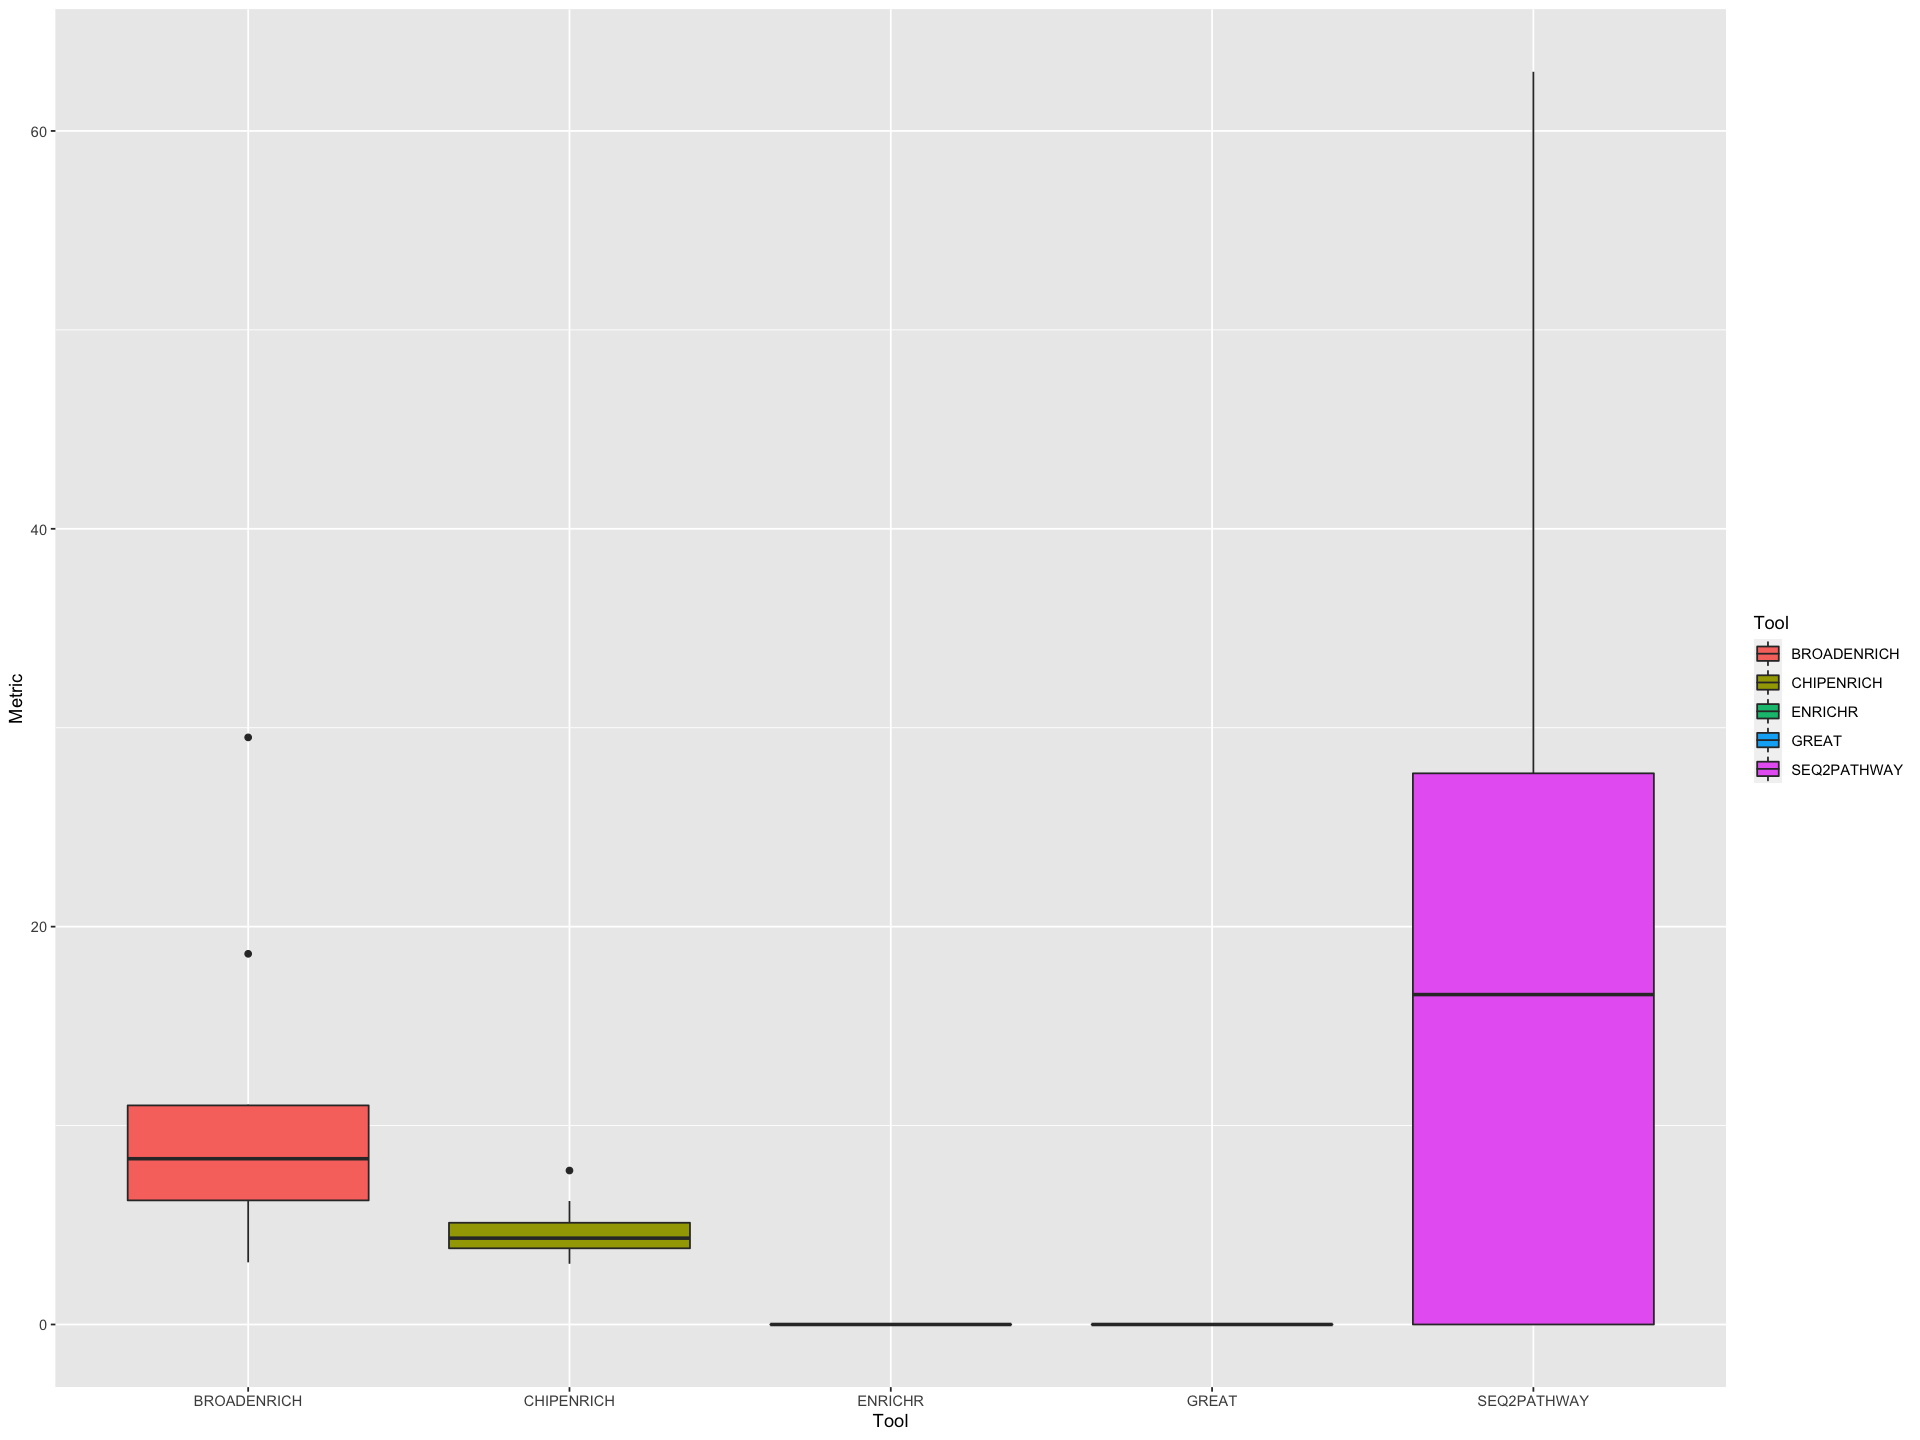

In [20]:
options(repr.plot.width=16, repr.plot.height=12) ## reframe default plot size in the jupyter notebook. 

source("./protocolFunctions/plotMetrics.R") ## Function to plot comparison metrics
plotMetrics(plotPrioritization)

### Sensitivity, Specificity, and Precision

The *calculateSensitivitySpecificityPrecision* function returns a list of triplet of sensitivity, specificity, and precision for each tool, for all tools. The output has to be modified to extract median sensitivities, specificities, and precisions explicitly and source to the plotting.

In [21]:
## Let's assemble a master list holding outputs from the said function.

source("./protocolFunctions/calculateSensitivitySpecificityPrecision.R")
resultsSensitivitySpecifictyPrecision <- lapply(1:length(toolsResults), calculateSensitivitySpecificityPrecision)

In [22]:
## The consolidated data frame is as under.

resultsSensitivitySpecifictyPrecision

colorectalCancerPool,alzheimersDiseasePool,gastricCancerPool,prostateCancerPool,Samples,Value
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
0.1428571,0.1428571,0.125,0.2,GSE84618,0.1428571
0.2857143,0.1428571,0.625,0.5,GSM1847178,0.2857143
0.4761905,0.5714286,0.500,0.6,GSM2058021,0.4761905
0.5238095,0.5714286,0.500,0.5,GSM2058022,0.5238095
0.5714286,0.5714286,0.625,0.6,GSM2058023,0.5714286
0.0952381,0.0000000,0.125,0.0,GSM2101436,0.1250000
0.6190476,0.5714286,0.750,0.7,GSM2101437,0.7500000
0.2380952,0.0000000,0.250,0.2,GSM2101438,0.2500000
0.2380952,0.1428571,0.375,0.1,GSM2101439,0.3750000


In [23]:
consolidatedSensitivity <- vector("list", length(toolsResults))
consolidatedSpecificity<- vector("list", length(toolsResults))
consolidatedPrecision <- vector("list", length(toolsResults))

for(i in 1: length(toolsResults)){ consolidatedSensitivity[[i]] <- append(consolidatedSensitivity[[i]],(resultsSensitivitySpecifictyPrecision[[i]][[1]]))}
for(i in 1: length(toolsResults)){ consolidatedSpecificity[[i]] <- append(consolidatedSpecificity[[i]],(resultsSensitivitySpecifictyPrecision[[i]][[2]]))}
for(i in 1: length(toolsResults)){ consolidatedPrecision[[i]] <- append(consolidatedPrecision[[i]],(resultsSensitivitySpecifictyPrecision[[i]][[3]]))}

Now, we have exclusive data for comparison metrics. We shall proceed with the visualization of results.

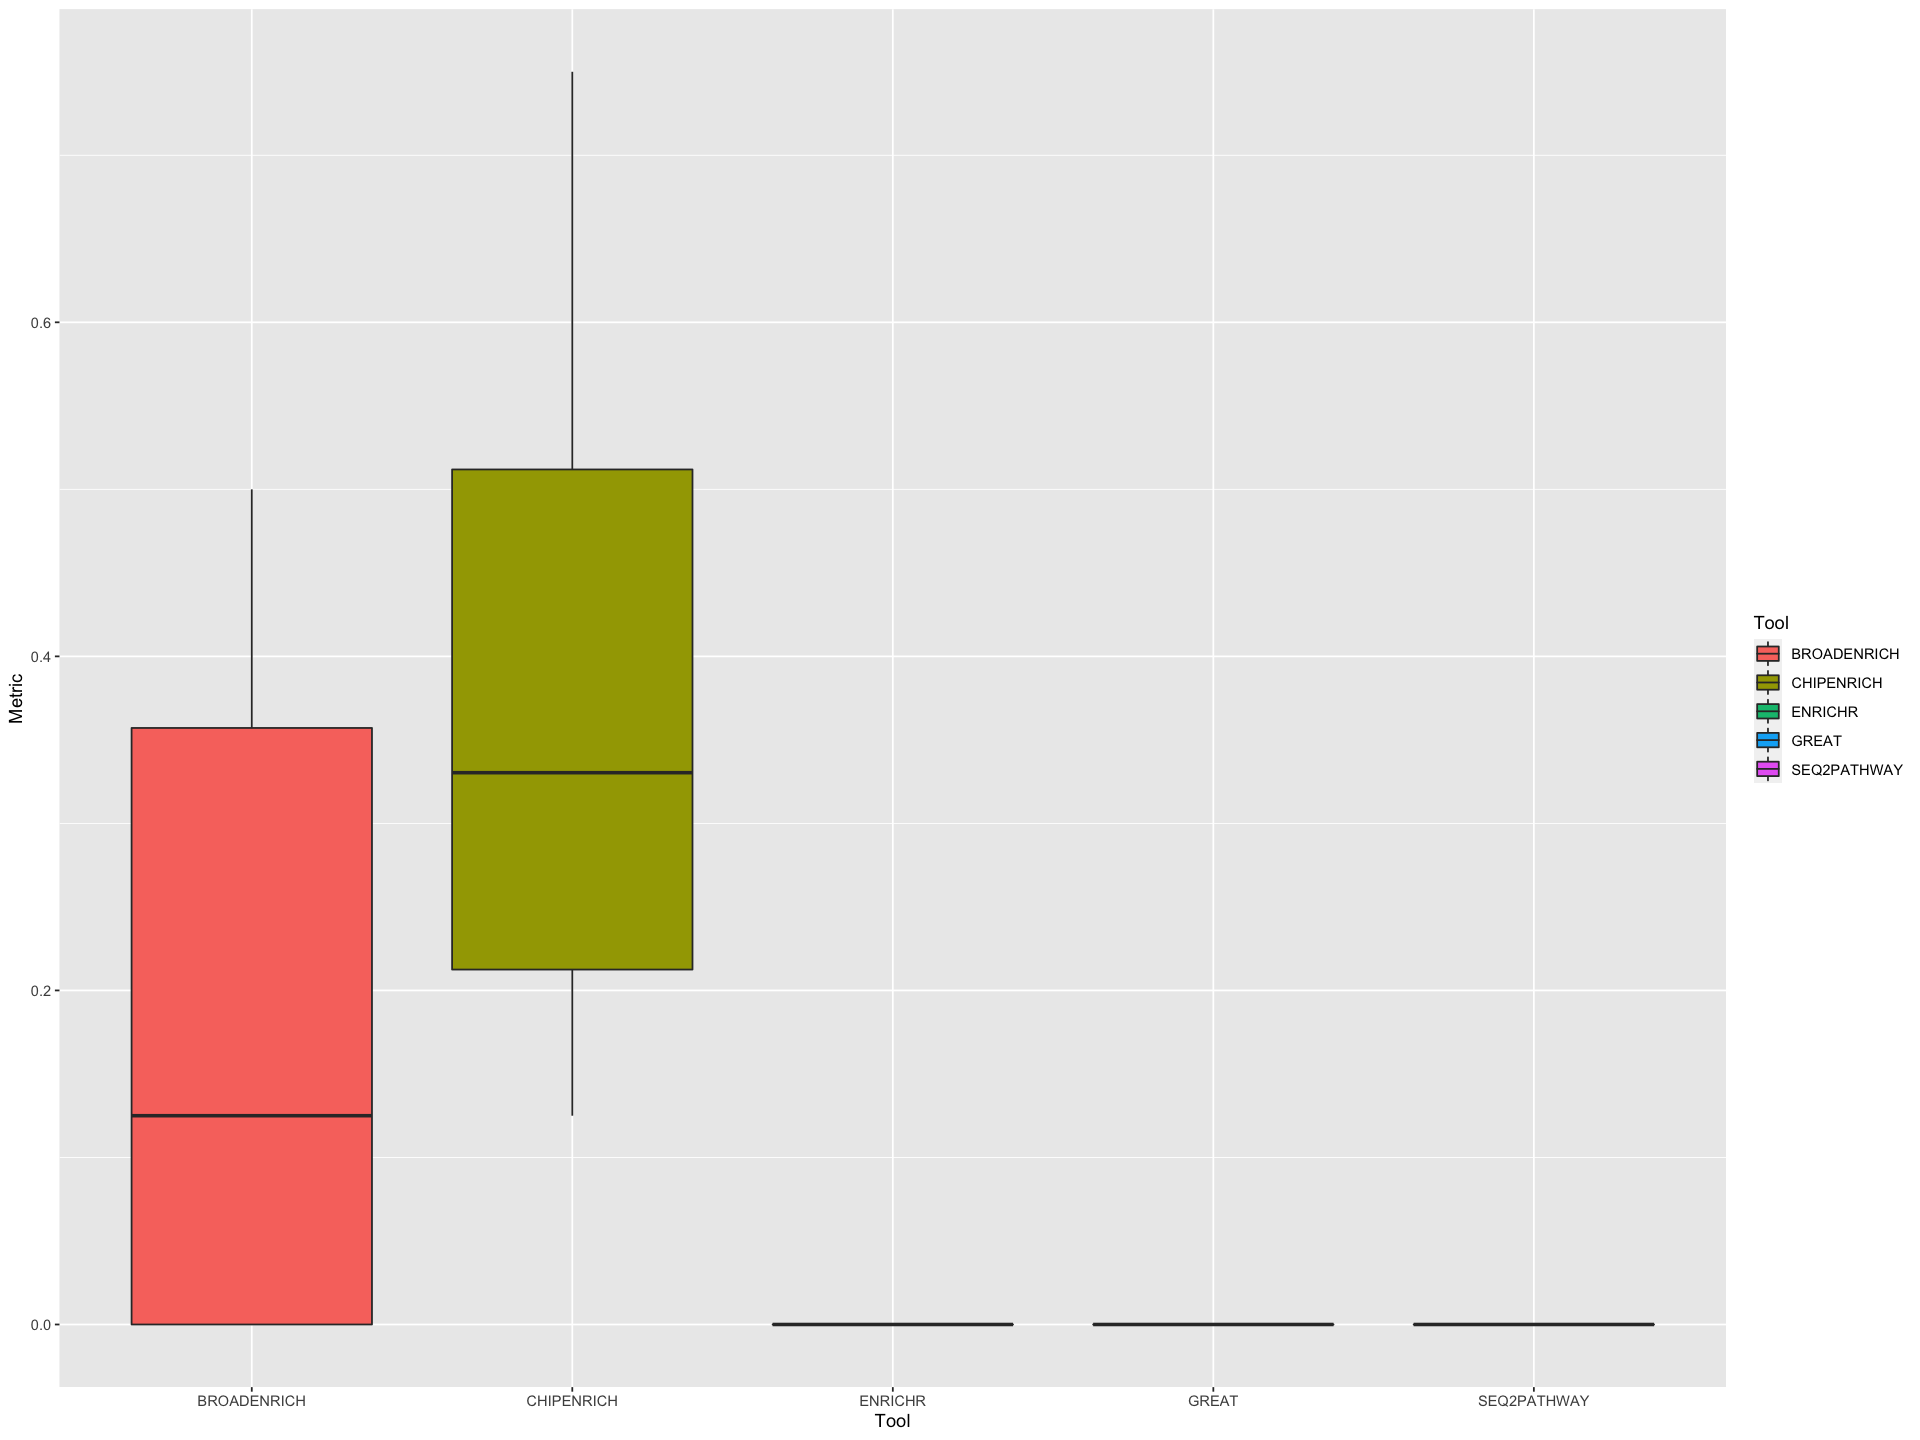

In [24]:
## Calling intermediary functions

source("./protocolFunctions/frameMe.R") ## This function regularizes the format of data for plotting.
source("./protocolFunctions/plotMetrics.R") ## Generates ggplots.

## Sensitivity

names(consolidatedSensitivity) <- toolsResults
consolidatedSensitivity <- lapply(consolidatedSensitivity, function(x) as.data.frame(x))
plotSensitivity <- frameMe(consolidatedSensitivity)
plotMetrics(plotSensitivity)

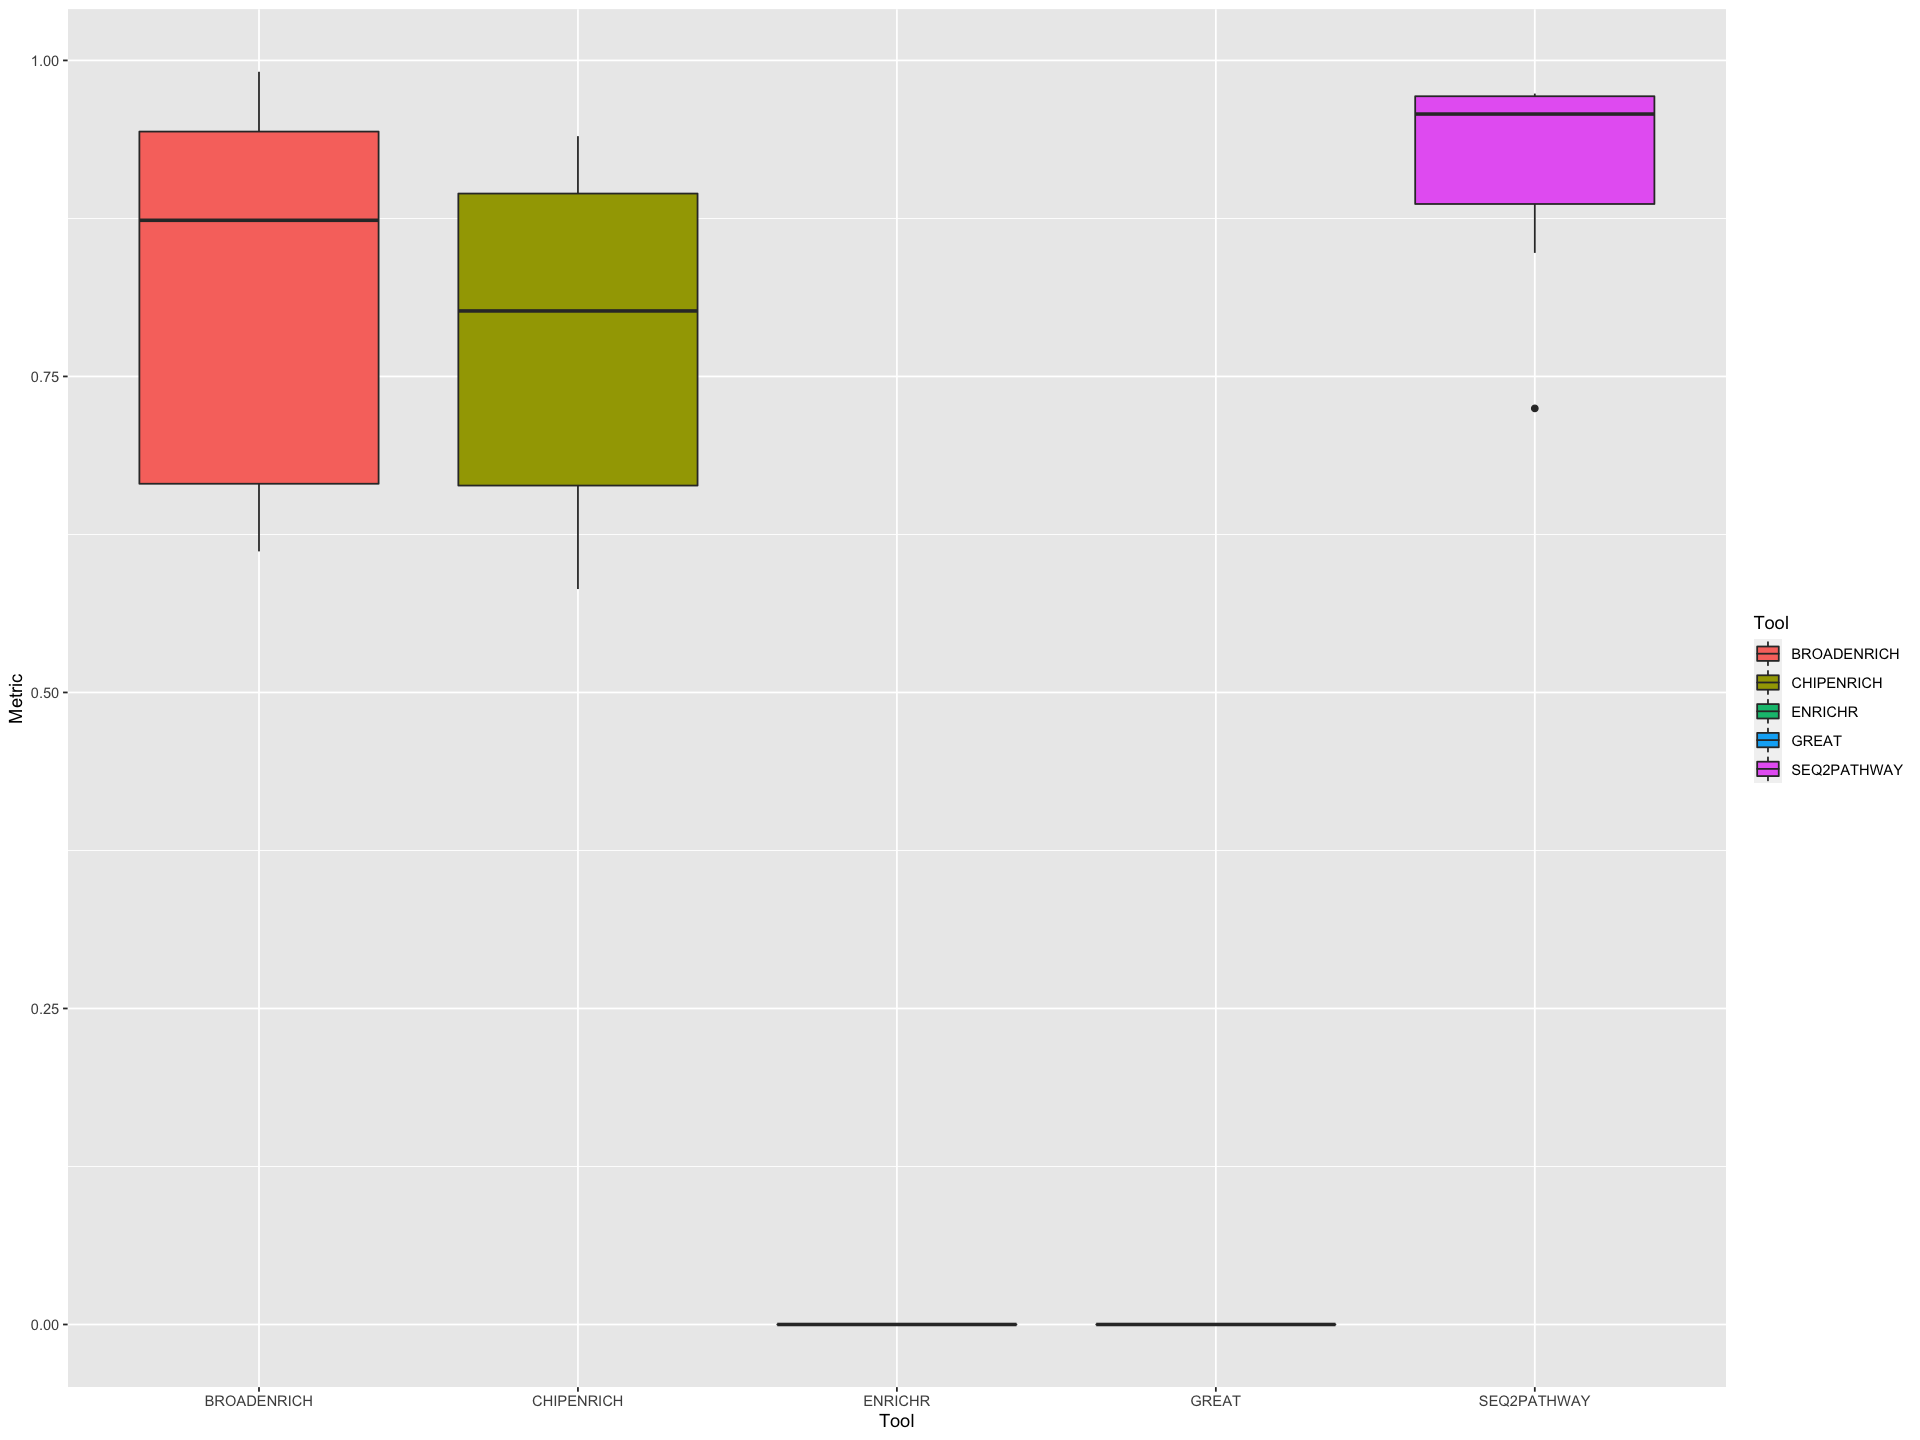

In [25]:
## Specificity

names(consolidatedSpecificity) <- toolsResults
consolidatedSpecificity <- lapply(consolidatedSpecificity, function(x) as.data.frame(x))
plotSpecificity <- frameMe(consolidatedSpecificity)
plotMetrics(plotSpecificity)

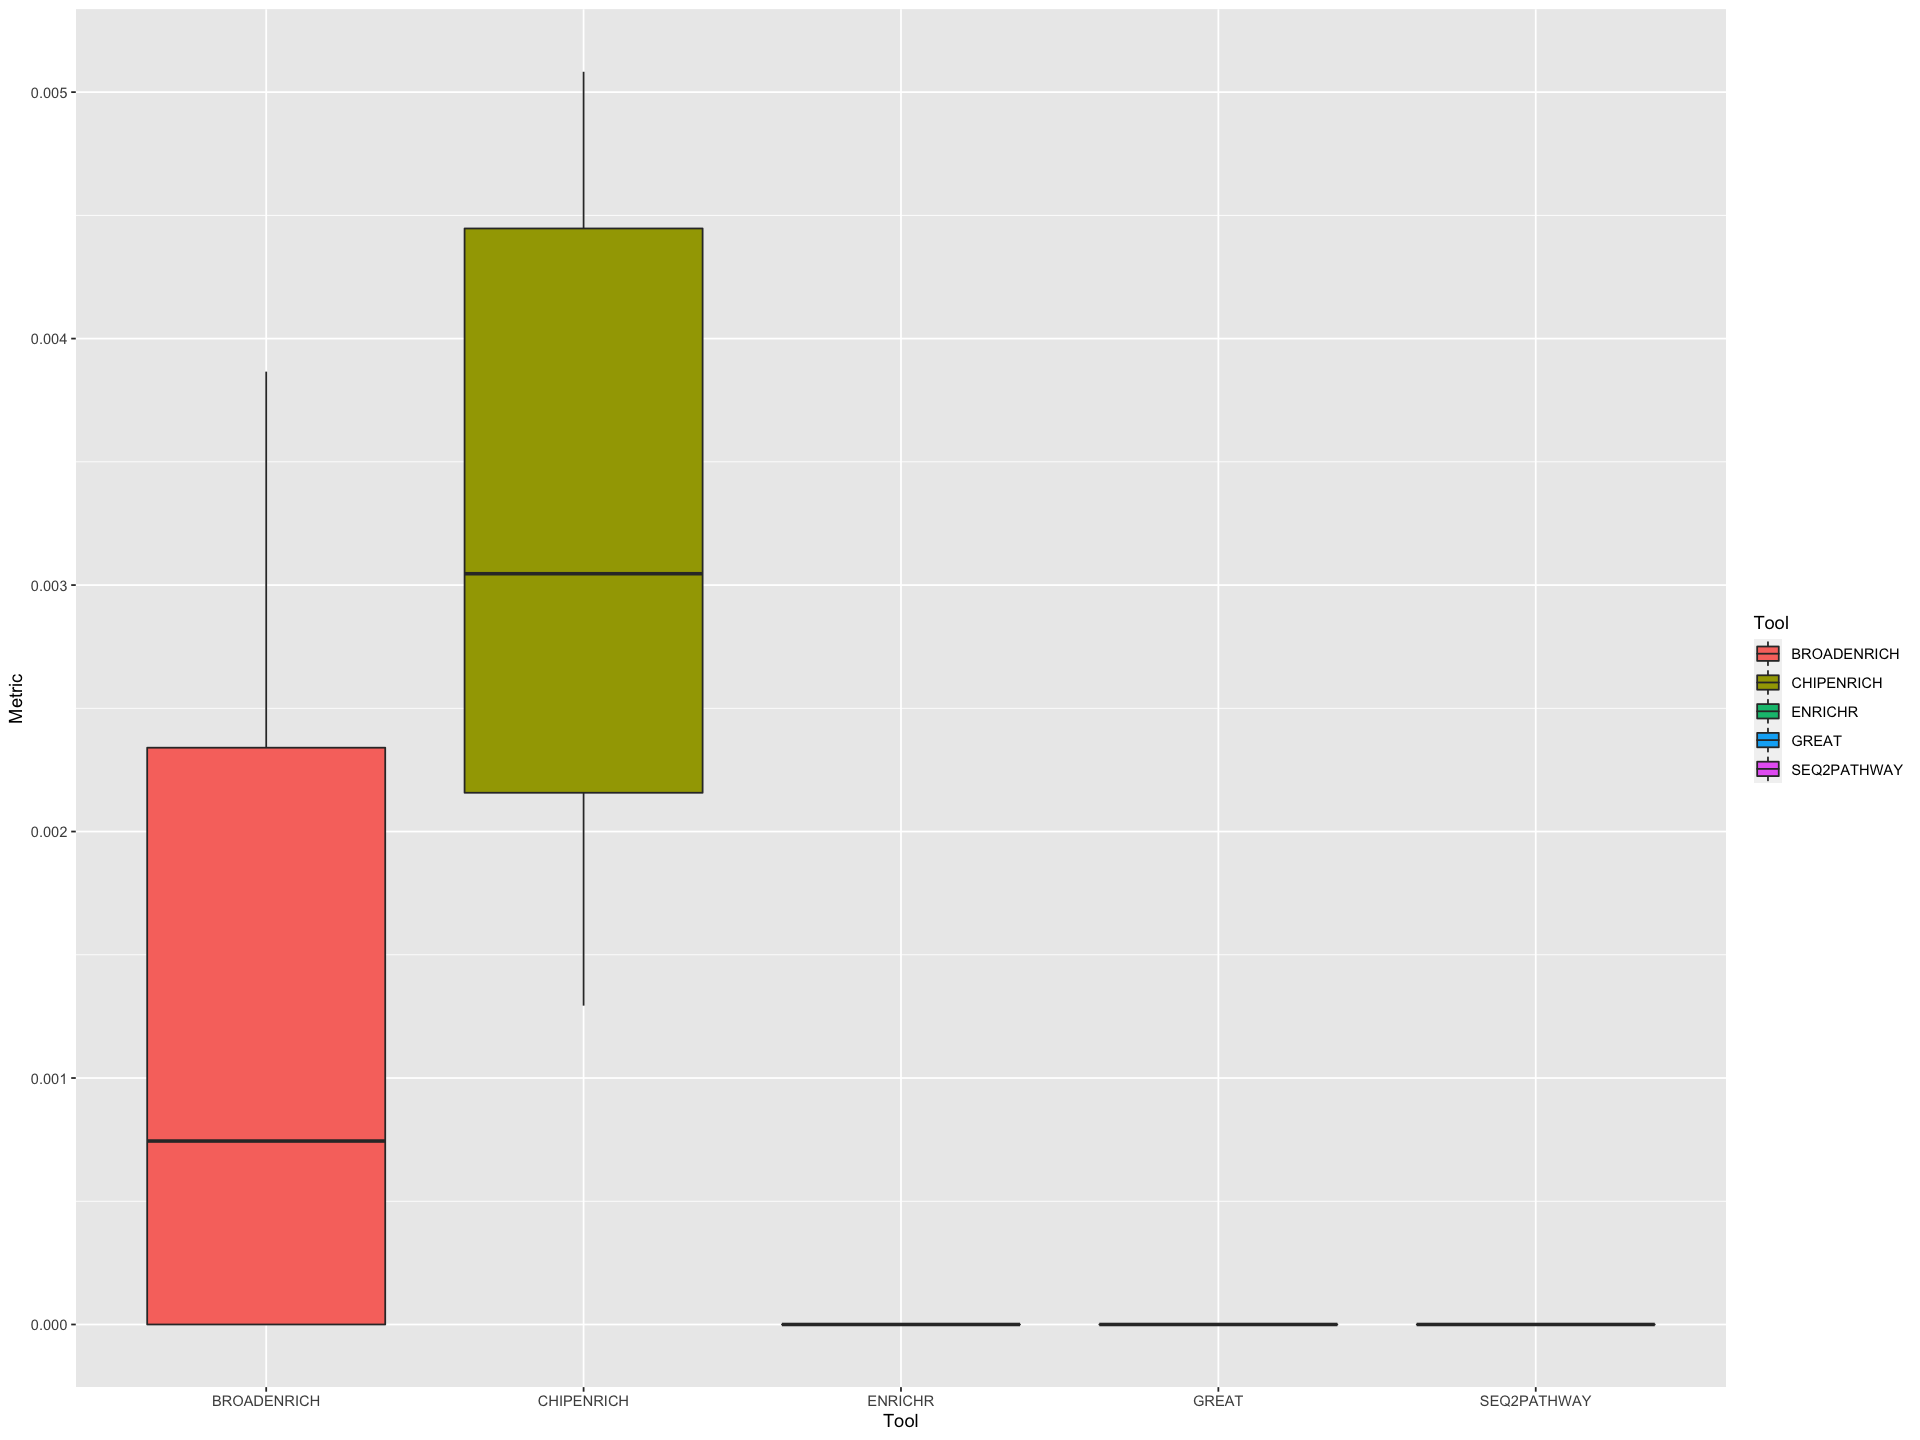

In [26]:
## Precision

names(consolidatedPrecision) <- toolsResults
consolidatedPrecision <- lapply(consolidatedPrecision, function(x) as.data.frame(x))
plotPrecision <- frameMe(consolidatedPrecision)
plotMetrics(plotPrecision)

### ROC Plot

**Reciever Operating Characteristic(ROC) Curve** is a visualization to depict the ratio of *1-specificity* versus *sensitivity* of a method. This engenders a measure for performance evaluation.  

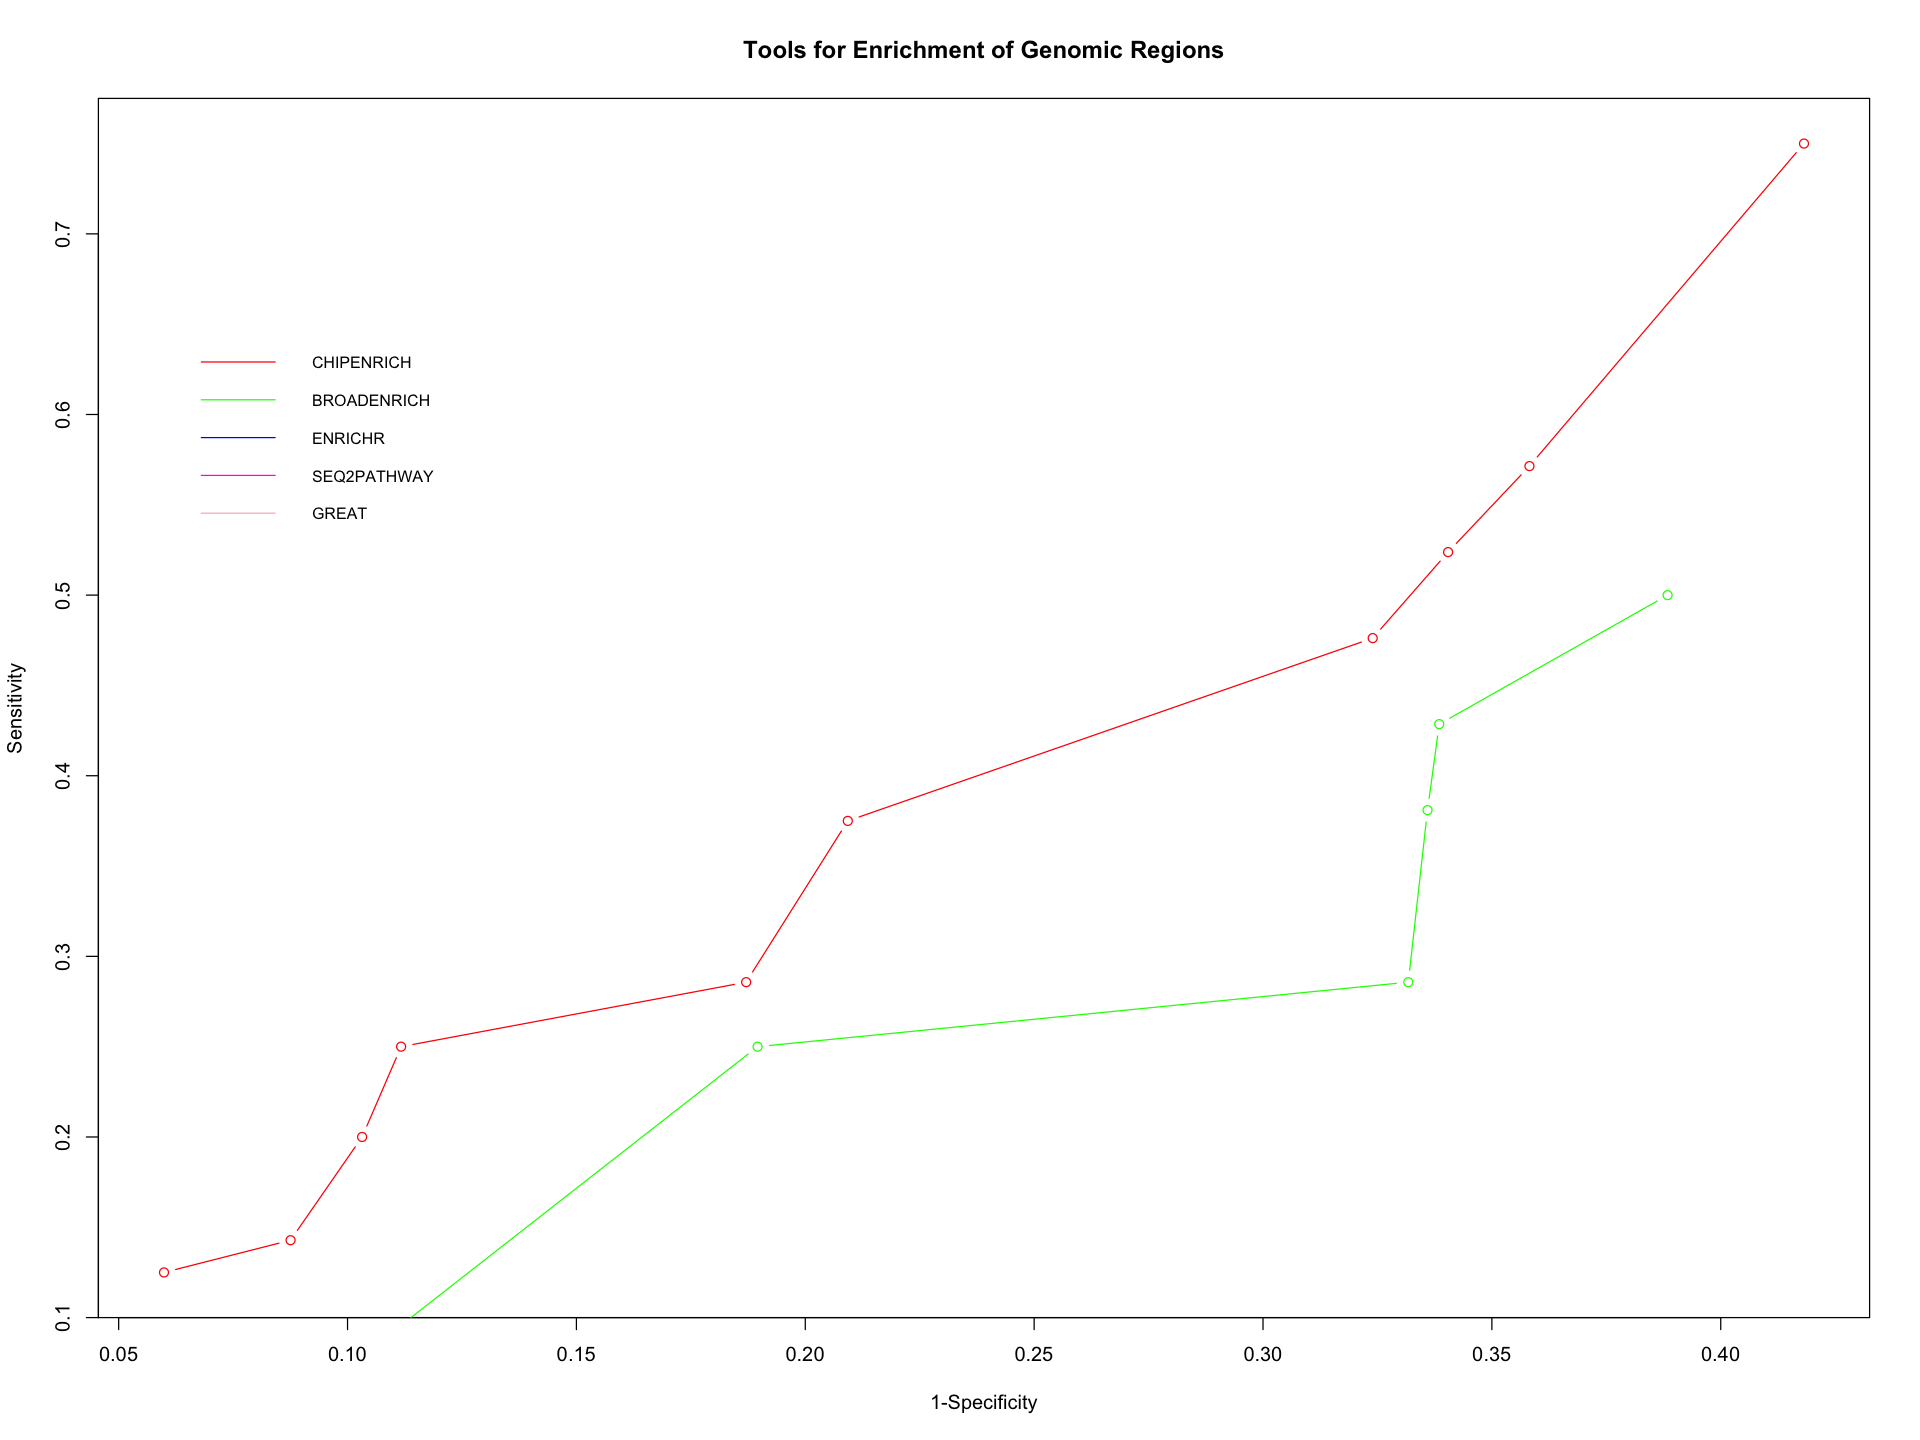

In [27]:
source("./protocolFunctions/rocPlot.R")
rocPlot()

## Extending Comparison to Simulation Data

The notion of data simulation corroborates the sturdiness of the comparison results that have been engendered. It helps establish the dexterity of the tools given the noise in the data. Cross evaluation of efficacies of the tools in question could be met via simulated data, the workflow for which has been illustrated below.

<img src="simulationTheme.jpeg" width="800"/>

When the original dataset is pruned by certain proportions, the enrichment results are likely to show some discrepancy in results, i.e. some genes must not be present as the regions have been omitted. If the genes are still present, in comparison to the original dataset enrichment results, this will highlight the case for False Negative genes. 
For simulation for finding false postives, it is required that some random tracks be added to the original tracks.

### Simulation for False Negatives

The following functions simulate the data for all the samples of the benchmark dataset. Later, the user is asked for a sample to choose and the corresponding data is sourced for further analysis. 

In [12]:
source("./protocolFunctions/simulationFalseNegatives.R")
forFalseNegatives <- simulationFalseNegatives()
print(forFalseNegatives)

saveRDS(forFalseNegatives, "./forFalseNegatives.rds")

Joining, by = c("chrom", "start", "end")
Joining, by = c("chrom", "start", "end")
Joining, by = c("chrom", "start", "end")
Joining, by = c("chrom", "start", "end")
Joining, by = c("chrom", "start", "end")
Joining, by = c("chrom", "start", "end")
Joining, by = c("chrom", "start", "end")
Joining, by = c("chrom", "start", "end")
Joining, by = c("chrom", "start", "end")
Joining, by = c("chrom", "start", "end")
Joining, by = c("chrom", "start", "end")
Joining, by = c("chrom", "start", "end")
Joining, by = c("chrom", "start", "end")
Joining, by = c("chrom", "start", "end")
Joining, by = c("chrom", "start", "end")
Joining, by = c("chrom", "start", "end")
Joining, by = c("chrom", "start", "end")
Joining, by = c("chrom", "start", "end")
Joining, by = c("chrom", "start", "end")
Joining, by = c("chrom", "start", "end")
Joining, by = c("chrom", "start", "end")
Joining, by = c("chrom", "start", "end")
Joining, by = c("chrom", "start", "end")
Joining, by = c("chrom", "start", "end")
Joining, by = c(

### Simulation for False Positives

In [13]:
source("./protocolFunctions/simulationFalsePositives.R")
forFalsePositives <- simulationFalsePositives()
print(forFalsePositives)

saveRDS(forFalsePositives, "./forFalsePositives.rds")

Next, the user enters the sample to simulate the data for. The task in carried by the function *picksample* (See definition). 

In [1]:
source("./protocolFunctions/pickSample.R")
chosenOne <- pickSample() ## define a list to hold return from the function
## for reference we take GSE84618 as our test sample.

Enter the sample name:GSE84618


In [3]:
## Let us save the simulation data in an explicit memory location: "simulatedData"

system('mkdir ./simulation/') ## subdirectory for dedicated tasks on simulation 
system('mkdir ./simulation/simulatedData/') ## create a subdirectory to store simulation data

## saving sample data 

  for(i in 1:length(chosenOne))
  {
    for (j in 1:length(chosenOne[[i]]))
    {
      if(i==1) ## list index for false negatives
      {
        write.table(chosenOne[[i]][[j]], file = paste0("./simulation/simulatedData/forFalseNegatives_", 
                                                       paste0(names(chosenOne[[i]][j]), ".bed")), 
                  col.names = FALSE, row.names = FALSE, sep = "\t", quote = FALSE)
      }
      else ## list index for false positives, i.e. 2
      {
        write.table(chosenOne[[i]][[j]], file = paste0("./simulation/simulatedData/forFalsePositives_", 
                                                       paste0(names(chosenOne[[i]][j]), ".bed")), 
                    col.names = FALSE, row.names = FALSE, sep = "\t", quote = FALSE)      
      }
    }
  }

## Reiterating the Protocol for Simulation Data

Now, our new set of samples are situated in the sub-directory **simulatedData**, inside **simulation** folder. The entire protocol of tool execution, efficiency measurement, and visualization of performance metrics shall henceforth be repeated. Just like before, we shall execute all the R-based tools and refer to the web-based tools extraneaously.

We shall conduct the analysis of the simulation data in the *simulation* folder and this shall be our new working directory.

In [12]:
setwd("./simulation/") ## This is CRUCIAL !!!
source("../protocolFunctions/dataImportClean.R")
dataImportClean("./simulatedData/")

In [13]:
samplesInBED <- readRDS("samplesInBED.rds")
ChIPSeqSamples <- readRDS("ChIPSeqSamples.rds")

In [14]:
ChIPSeqSamples

[1] "forFalseNegatives_GSE84618_1" "forFalseNegatives_GSE84618_2"
 [3] "forFalseNegatives_GSE84618_3" "forFalseNegatives_GSE84618_4"
 [5] "forFalseNegatives_GSE84618_5" "forFalsePositives_GSE84618_1"
 [7] "forFalsePositives_GSE84618_2" "forFalsePositives_GSE84618_3"
 [9] "forFalsePositives_GSE84618_4" "forFalsePositives_GSE84618_5"

In [15]:
samplesInBED

GRangesList object of length 10:
$forFalseNegatives_GSE84618_1
GRanges object with 8810 ranges and 0 metadata columns:
         seqnames              ranges strand
            <Rle>           <IRanges>  <Rle>
     [1]     chr1 181153247-181153976      *
     [2]     chr1   54590230-54590888      *
     [3]     chr1 183400489-183400671      *
     [4]     chr1   55420208-55420369      *
     [5]     chr1   20114346-20114575      *
     ...      ...                 ...    ...
  [8806]     chrX   68346920-68347399      *
  [8807]     chrX   70474572-70474901      *
  [8808]     chrX   53105208-53105440      *
  [8809]     chrX   20065462-20065651      *
  [8810]     chrX   77395786-77395955      *
  -------
  seqinfo: 62 sequences from hg19 genome; no seqlengths

...
<9 more elements>

In [14]:
source("../protocolFunctions/executeChipenrichBroadenrichSeq2pathway.R")
executeChipenrichBroadenrichSeq2pathway("./simulatedData/")

Reading peaks from ./simulatedData/forFalseNegatives_GSE84618_1.bed

Warning message in postprocess_peak_grs(gr):
“Some input regions overlap. It is recommended that input regions be disjoint.”


[1] "python process start: 2020-01-16 15:15:22.124148"
[2] "Load Reference"                                  
[3] "Check Reference files"                           
[4] "fixed reference done: 2020-01-16 15:15:42.094055"
[5] "Start Annotation"                                
[6] "Finish Annotation"                               
[7] "python process end: 2020-01-16 15:15:44.468329"  
[1] "Start test.............."
[1] "Fisher's exact test done"


Reading peaks from ./simulatedData/forFalseNegatives_GSE84618_2.bed



[1] "python process start: 2020-01-16 15:20:19.443789"
[2] "Load Reference"                                  
[3] "Check Reference files"                           
[4] "fixed reference done: 2020-01-16 15:20:39.009826"
[5] "Start Annotation"                                
[6] "Finish Annotation"                               
[7] "python process end: 2020-01-16 15:20:41.165884"  
[1] "Start test.............."
[1] "Fisher's exact test done"


Reading peaks from ./simulatedData/forFalseNegatives_GSE84618_3.bed



[1] "python process start: 2020-01-16 15:25:21.500180"
[2] "Load Reference"                                  
[3] "Check Reference files"                           
[4] "fixed reference done: 2020-01-16 15:25:41.275841"
[5] "Start Annotation"                                
[6] "Finish Annotation"                               
[7] "python process end: 2020-01-16 15:25:43.144849"  
[1] "Start test.............."
[1] "Fisher's exact test done"


Reading peaks from ./simulatedData/forFalseNegatives_GSE84618_4.bed



[1] "python process start: 2020-01-16 15:30:14.182619"
[2] "Load Reference"                                  
[3] "Check Reference files"                           
[4] "fixed reference done: 2020-01-16 15:30:33.783602"
[5] "Start Annotation"                                
[6] "Finish Annotation"                               
[7] "python process end: 2020-01-16 15:30:35.381423"  
[1] "Start test.............."
[1] "Fisher's exact test done"


Reading peaks from ./simulatedData/forFalseNegatives_GSE84618_5.bed



[1] "python process start: 2020-01-16 15:34:48.794588"
[2] "Load Reference"                                  
[3] "Check Reference files"                           
[4] "fixed reference done: 2020-01-16 15:35:08.472033"
[5] "Start Annotation"                                
[6] "Finish Annotation"                               
[7] "python process end: 2020-01-16 15:35:09.879931"  
[1] "Start test.............."
[1] "Fisher's exact test done"


Reading peaks from ./simulatedData/forFalsePositives_GSE84618_1.bed



 [1] "python process start: 2020-01-16 15:39:03.048956"
 [2] "Load Reference"                                  
 [3] "Check Reference files"                           
 [4] "fixed reference done: 2020-01-16 15:39:22.646514"
 [5] "Start Annotation"                                
 [6] "Un_gl000232 Chromosome not registered"           
 [7] "Un_gl000224 Chromosome not registered"           
 [8] "Un_gl000224 Chromosome not registered"           
 [9] "Un_gl000224 Chromosome not registered"           
[10] "Un_gl000224 Chromosome not registered"           
[11] "Un_gl000224 Chromosome not registered"           
[12] "Un_gl000219 Chromosome not registered"           
[13] "Un_gl000219 Chromosome not registered"           
[14] "Un_gl000219 Chromosome not registered"           
[15] "Un_gl000219 Chromosome not registered"           
[16] "4_gl000193_random Chromosome not registered"     
[17] "4_gl000193_random Chromosome not registered"     
[18] "4_gl000193_random Chromosome not registere

Reading peaks from ./simulatedData/forFalsePositives_GSE84618_2.bed



  [1] "python process start: 2020-01-16 15:45:52.767563"
  [2] "Load Reference"                                  
  [3] "Check Reference files"                           
  [4] "fixed reference done: 2020-01-16 15:46:12.252779"
  [5] "Start Annotation"                                
  [6] "Un_gl000222 Chromosome not registered"           
  [7] "Un_gl000232 Chromosome not registered"           
  [8] "Un_gl000232 Chromosome not registered"           
  [9] "17_ctg5_hap1 Chromosome not registered"          
 [10] "17_ctg5_hap1 Chromosome not registered"          
 [11] "17_ctg5_hap1 Chromosome not registered"          
 [12] "17_ctg5_hap1 Chromosome not registered"          
 [13] "17_ctg5_hap1 Chromosome not registered"          
 [14] "17_ctg5_hap1 Chromosome not registered"          
 [15] "17_ctg5_hap1 Chromosome not registered"          
 [16] "17_ctg5_hap1 Chromosome not registered"          
 [17] "Un_gl000224 Chromosome not registered"           
 [18] "Un_gl000224 Chromosome n

Reading peaks from ./simulatedData/forFalsePositives_GSE84618_3.bed



  [1] "python process start: 2020-01-16 15:53:35.566087"
  [2] "Load Reference"                                  
  [3] "Check Reference files"                           
  [4] "fixed reference done: 2020-01-16 15:53:55.068367"
  [5] "Start Annotation"                                
  [6] "Un_gl000225 Chromosome not registered"           
  [7] "Un_gl000225 Chromosome not registered"           
  [8] "Un_gl000225 Chromosome not registered"           
  [9] "Un_gl000225 Chromosome not registered"           
 [10] "Un_gl000225 Chromosome not registered"           
 [11] "Un_gl000225 Chromosome not registered"           
 [12] "Un_gl000225 Chromosome not registered"           
 [13] "Un_gl000225 Chromosome not registered"           
 [14] "Un_gl000225 Chromosome not registered"           
 [15] "Un_gl000225 Chromosome not registered"           
 [16] "Un_gl000225 Chromosome not registered"           
 [17] "4_gl000193_random Chromosome not registered"     
 [18] "4_gl000193_random Chromo

Reading peaks from ./simulatedData/forFalsePositives_GSE84618_4.bed



  [1] "python process start: 2020-01-16 16:01:42.282800"
  [2] "Load Reference"                                  
  [3] "Check Reference files"                           
  [4] "fixed reference done: 2020-01-16 16:02:02.036602"
  [5] "Start Annotation"                                
  [6] "4_gl000194_random Chromosome not registered"     
  [7] "4_gl000194_random Chromosome not registered"     
  [8] "4_gl000194_random Chromosome not registered"     
  [9] "4_gl000194_random Chromosome not registered"     
 [10] "4_gl000194_random Chromosome not registered"     
 [11] "Un_gl000214 Chromosome not registered"           
 [12] "Un_gl000214 Chromosome not registered"           
 [13] "Un_gl000214 Chromosome not registered"           
 [14] "Un_gl000214 Chromosome not registered"           
 [15] "Un_gl000214 Chromosome not registered"           
 [16] "Un_gl000214 Chromosome not registered"           
 [17] "Un_gl000214 Chromosome not registered"           
 [18] "Un_gl000214 Chromosome n

Reading peaks from ./simulatedData/forFalsePositives_GSE84618_5.bed



  [1] "python process start: 2020-01-16 16:09:08.592425"
  [2] "Load Reference"                                  
  [3] "Check Reference files"                           
  [4] "fixed reference done: 2020-01-16 16:09:28.176047"
  [5] "Start Annotation"                                
  [6] "9_gl000199_random Chromosome not registered"     
  [7] "9_gl000199_random Chromosome not registered"     
  [8] "Un_gl000214 Chromosome not registered"           
  [9] "Un_gl000214 Chromosome not registered"           
 [10] "Un_gl000214 Chromosome not registered"           
 [11] "Un_gl000214 Chromosome not registered"           
 [12] "Un_gl000214 Chromosome not registered"           
 [13] "Un_gl000214 Chromosome not registered"           
 [14] "Un_gl000214 Chromosome not registered"           
 [15] "Un_gl000214 Chromosome not registered"           
 [16] "Un_gl000214 Chromosome not registered"           
 [17] "Un_gl000214 Chromosome not registered"           
 [18] "Un_gl000214 Chromosome n

Reading peaks from ./simulatedData/forFalseNegatives_GSE84618_1.bed

Assigning peaks to genes with assign_peaks(...) ..

Test: ChIP-Enrich

Genesets: Gene Ontology Biological Process

Running tests..

Test: ChIP-Enrich

Genesets: Gene Ontology Cellular Component

Running tests..

Test: ChIP-Enrich

Genesets: Gene Ontology Molecular Function

Running tests..

Test: ChIP-Enrich

Genesets: KEGG Pathways

Running tests..

Reading peaks from ./simulatedData/forFalseNegatives_GSE84618_2.bed

Assigning peaks to genes with assign_peaks(...) ..

Test: ChIP-Enrich

Genesets: Gene Ontology Biological Process

Running tests..

Test: ChIP-Enrich

Genesets: Gene Ontology Cellular Component

Running tests..

Test: ChIP-Enrich

Genesets: Gene Ontology Molecular Function

Running tests..

Test: ChIP-Enrich

Genesets: KEGG Pathways

Running tests..

Reading peaks from ./simulatedData/forFalseNegatives_GSE84618_3.bed

Assigning peaks to genes with assign_peaks(...) ..

Test: ChIP-Enrich

Genesets: Gene O

Applying correction for geneset GO:0090036 with 15 genes...

Applying correction for geneset GO:0090136 with 15 genes...

Applying correction for geneset GO:0090177 with 15 genes...

Applying correction for geneset GO:0090185 with 17 genes...

Applying correction for geneset GO:0098901 with 27 genes...

Applying correction for geneset GO:1900101 with 23 genes...

Applying correction for geneset GO:1901889 with 20 genes...

Applying correction for geneset GO:1902043 with 17 genes...

Applying correction for geneset GO:1902932 with 21 genes...

Applying correction for geneset GO:1903392 with 16 genes...

Applying correction for geneset GO:1903579 with 19 genes...

Applying correction for geneset GO:1904355 with 17 genes...

Applying correction for geneset GO:1904357 with 20 genes...

Applying correction for geneset GO:2000036 with 22 genes...

Applying correction for geneset GO:2000104 with 19 genes...

Applying correction for geneset GO:2000269 with 15 genes...

Applying correction for 

Applying correction for geneset GO:0032011 with 16 genes...

Applying correction for geneset GO:0032012 with 16 genes...

Applying correction for geneset GO:0032042 with 18 genes...

Applying correction for geneset GO:0032075 with 15 genes...

Applying correction for geneset GO:0032288 with 18 genes...

Applying correction for geneset GO:0032332 with 19 genes...

Applying correction for geneset GO:0032506 with 19 genes...

Applying correction for geneset GO:0032516 with 15 genes...

Applying correction for geneset GO:0032891 with 17 genes...

Applying correction for geneset GO:0032922 with 55 genes...

Applying correction for geneset GO:0032958 with 21 genes...

Applying correction for geneset GO:0033005 with 16 genes...

Applying correction for geneset GO:0033137 with 24 genes...

Applying correction for geneset GO:0033630 with 17 genes...

Applying correction for geneset GO:0033866 with 16 genes...

Applying correction for geneset GO:0033962 with 20 genes...

Applying correction for 

Applying correction for geneset GO:1900077 with 32 genes...

Applying correction for geneset GO:1900101 with 23 genes...

Applying correction for geneset GO:1900151 with 16 genes...

Applying correction for geneset GO:1900153 with 16 genes...

Applying correction for geneset GO:1900745 with 18 genes...

Applying correction for geneset GO:1901032 with 17 genes...

Applying correction for geneset GO:1901380 with 18 genes...

Applying correction for geneset GO:1901522 with 27 genes...

Applying correction for geneset GO:1901881 with 17 genes...

Applying correction for geneset GO:1901889 with 20 genes...

Applying correction for geneset GO:1902043 with 17 genes...

Applying correction for geneset GO:1902116 with 30 genes...

Applying correction for geneset GO:1902188 with 15 genes...

Applying correction for geneset GO:1902590 with 24 genes...

Applying correction for geneset GO:1902592 with 24 genes...

Applying correction for geneset GO:1902745 with 26 genes...

Applying correction for 

Running tests..

Applying correction for geneset hsa00052 with 27 genes...

Applying correction for geneset hsa00450 with 17 genes...

Applying correction for geneset hsa00531 with 18 genes...

Applying correction for geneset hsa00533 with 15 genes...

Applying correction for geneset hsa00630 with 18 genes...

Applying correction for geneset hsa00760 with 24 genes...

Applying correction for geneset hsa00900 with 15 genes...

Applying correction for geneset hsa04710 with 22 genes...

Reading peaks from ./simulatedData/forFalsePositives_GSE84618_4.bed

Assigning peaks to genes with assign_peaks(...) ..

Test: ChIP-Enrich

Genesets: Gene Ontology Biological Process

Running tests..

Applying correction for geneset GO:0000028 with 15 genes...

Applying correction for geneset GO:0000042 with 18 genes...

Applying correction for geneset GO:0000076 with 17 genes...

Applying correction for geneset GO:0000132 with 16 genes...

Applying correction for geneset GO:0000301 with 23 genes...

Apply

Applying correction for geneset GO:0030277 with 16 genes...

Applying correction for geneset GO:0030511 with 23 genes...

Applying correction for geneset GO:0030540 with 17 genes...

Applying correction for geneset GO:0030865 with 34 genes...

Applying correction for geneset GO:0030866 with 29 genes...

Applying correction for geneset GO:0030878 with 24 genes...

Applying correction for geneset GO:0031000 with 16 genes...

Applying correction for geneset GO:0031033 with 15 genes...

Applying correction for geneset GO:0031065 with 16 genes...

Applying correction for geneset GO:0031114 with 18 genes...

Applying correction for geneset GO:0031290 with 21 genes...

Applying correction for geneset GO:0031293 with 16 genes...

Applying correction for geneset GO:0031440 with 20 genes...

Applying correction for geneset GO:0031498 with 20 genes...

Applying correction for geneset GO:0031577 with 36 genes...

Applying correction for geneset GO:0031579 with 23 genes...

Applying correction for 

Applying correction for geneset GO:0046621 with 23 genes...

Applying correction for geneset GO:0046627 with 30 genes...

Applying correction for geneset GO:0046825 with 38 genes...

Applying correction for geneset GO:0046827 with 20 genes...

Applying correction for geneset GO:0046885 with 17 genes...

Applying correction for geneset GO:0048011 with 26 genes...

Applying correction for geneset GO:0048012 with 16 genes...

Applying correction for geneset GO:0048169 with 23 genes...

Applying correction for geneset GO:0048172 with 15 genes...

Applying correction for geneset GO:0048255 with 31 genes...

Applying correction for geneset GO:0048268 with 16 genes...

Applying correction for geneset GO:0048308 with 15 genes...

Applying correction for geneset GO:0048368 with 15 genes...

Applying correction for geneset GO:0048384 with 30 genes...

Applying correction for geneset GO:0048385 with 16 genes...

Applying correction for geneset GO:0048668 with 24 genes...

Applying correction for 

Applying correction for geneset GO:0080182 with 15 genes...

Applying correction for geneset GO:0086001 with 65 genes...

Applying correction for geneset GO:0086002 with 48 genes...

Applying correction for geneset GO:0086003 with 58 genes...

Applying correction for geneset GO:0086004 with 35 genes...

Applying correction for geneset GO:0086005 with 31 genes...

Applying correction for geneset GO:0086011 with 24 genes...

Applying correction for geneset GO:0086012 with 22 genes...

Applying correction for geneset GO:0086013 with 21 genes...

Applying correction for geneset GO:0086014 with 19 genes...

Applying correction for geneset GO:0086019 with 30 genes...

Applying correction for geneset GO:0086026 with 19 genes...

Applying correction for geneset GO:0086066 with 19 genes...

Applying correction for geneset GO:0086091 with 35 genes...

Applying correction for geneset GO:0090036 with 15 genes...

Applying correction for geneset GO:0090049 with 19 genes...

Applying correction for 

Applying correction for geneset GO:0042575 with 17 genes...

Applying correction for geneset GO:0042588 with 15 genes...

Applying correction for geneset GO:0042645 with 41 genes...

Applying correction for geneset GO:0043198 with 34 genes...

Applying correction for geneset GO:0043657 with 15 genes...

Applying correction for geneset GO:0044215 with 19 genes...

Applying correction for geneset GO:0044216 with 19 genes...

Applying correction for geneset GO:0044217 with 19 genes...

Applying correction for geneset GO:0044295 with 17 genes...

Applying correction for geneset GO:0044298 with 19 genes...

Applying correction for geneset GO:0044447 with 28 genes...

Applying correction for geneset GO:0070822 with 16 genes...

Applying correction for geneset GO:0071782 with 16 genes...

Applying correction for geneset GO:0090545 with 17 genes...

Applying correction for geneset GO:0090568 with 31 genes...

Applying correction for geneset GO:0090723 with 17 genes...

Applying correction for 

Applying correction for geneset hsa00533 with 15 genes...

Applying correction for geneset hsa00630 with 18 genes...

Applying correction for geneset hsa00760 with 24 genes...

Applying correction for geneset hsa00900 with 15 genes...

Applying correction for geneset hsa03430 with 23 genes...

Applying correction for geneset hsa04320 with 24 genes...

Applying correction for geneset hsa04710 with 22 genes...

Applying correction for geneset hsa04966 with 27 genes...

Applying correction for geneset hsa05110 with 53 genes...

Applying correction for geneset hsa05216 with 29 genes...

Reading peaks from ./simulatedData/forFalsePositives_GSE84618_5.bed

Assigning peaks to genes with assign_peaks(...) ..

Test: ChIP-Enrich

Genesets: Gene Ontology Biological Process

Running tests..

Applying correction for geneset GO:0000002 with 27 genes...

Applying correction for geneset GO:0000027 with 23 genes...

Applying correction for geneset GO:0000028 with 15 genes...

Applying correction for ge

Applying correction for geneset GO:0009062 with 93 genes...

Applying correction for geneset GO:0009081 with 23 genes...

Applying correction for geneset GO:0009083 with 20 genes...

Applying correction for geneset GO:0009112 with 38 genes...

Applying correction for geneset GO:0009147 with 22 genes...

Applying correction for geneset GO:0009148 with 19 genes...

Applying correction for geneset GO:0009154 with 34 genes...

Applying correction for geneset GO:0009166 with 65 genes...

Applying correction for geneset GO:0009200 with 16 genes...

Applying correction for geneset GO:0009208 with 16 genes...

Applying correction for geneset GO:0009209 with 15 genes...

Applying correction for geneset GO:0009214 with 22 genes...

Applying correction for geneset GO:0009218 with 24 genes...

Applying correction for geneset GO:0009219 with 17 genes...

Applying correction for geneset GO:0009220 with 22 genes...

Applying correction for geneset GO:0009261 with 35 genes...

Applying correction for 

Applying correction for geneset GO:0034033 with 16 genes...

Applying correction for geneset GO:0034067 with 31 genes...

Applying correction for geneset GO:0034110 with 23 genes...

Applying correction for geneset GO:0034123 with 18 genes...

Applying correction for geneset GO:0034138 with 16 genes...

Applying correction for geneset GO:0034198 with 37 genes...

Applying correction for geneset GO:0034199 with 17 genes...

Applying correction for geneset GO:0034204 with 23 genes...

Applying correction for geneset GO:0034349 with 15 genes...

Applying correction for geneset GO:0034383 with 19 genes...

Applying correction for geneset GO:0034390 with 15 genes...

Applying correction for geneset GO:0034391 with 15 genes...

Applying correction for geneset GO:0034440 with 98 genes...

Applying correction for geneset GO:0034453 with 18 genes...

Applying correction for geneset GO:0034501 with 16 genes...

Applying correction for geneset GO:0035024 with 16 genes...

Applying correction for 

Applying correction for geneset GO:0048753 with 27 genes...

Applying correction for geneset GO:0048791 with 30 genes...

Applying correction for geneset GO:0048814 with 75 genes...

Applying correction for geneset GO:0048820 with 16 genes...

Applying correction for geneset GO:0050686 with 29 genes...

Applying correction for geneset GO:0050687 with 22 genes...

Applying correction for geneset GO:0050732 with 43 genes...

Applying correction for geneset GO:0050746 with 15 genes...

Applying correction for geneset GO:0050774 with 15 genes...

Applying correction for geneset GO:0050775 with 33 genes...

Applying correction for geneset GO:0050779 with 21 genes...

Applying correction for geneset GO:0050856 with 34 genes...

Applying correction for geneset GO:0050858 with 21 genes...

Applying correction for geneset GO:0050860 with 18 genes...

Applying correction for geneset GO:0050884 with 16 genes...

Applying correction for geneset GO:0050919 with 22 genes...

Applying correction for 

Applying correction for geneset GO:0072215 with 23 genes...

Applying correction for geneset GO:0072224 with 16 genes...

Applying correction for geneset GO:0072273 with 26 genes...

Applying correction for geneset GO:0072283 with 16 genes...

Applying correction for geneset GO:0072311 with 20 genes...

Applying correction for geneset GO:0072395 with 66 genes...

Applying correction for geneset GO:0072401 with 65 genes...

Applying correction for geneset GO:0072413 with 63 genes...

Applying correction for geneset GO:0072422 with 65 genes...

Applying correction for geneset GO:0072431 with 62 genes...

Applying correction for geneset GO:0072523 with 53 genes...

Applying correction for geneset GO:0072595 with 29 genes...

Applying correction for geneset GO:0072600 with 21 genes...

Applying correction for geneset GO:0072662 with 16 genes...

Applying correction for geneset GO:0072663 with 16 genes...

Applying correction for geneset GO:0072665 with 39 genes...

Applying correction for 

Applying correction for geneset GO:1990090 with 42 genes...

Applying correction for geneset GO:1990182 with 19 genes...

Applying correction for geneset GO:2000036 with 22 genes...

Applying correction for geneset GO:2000050 with 20 genes...

Applying correction for geneset GO:2000114 with 20 genes...

Applying correction for geneset GO:2000136 with 16 genes...

Applying correction for geneset GO:2000209 with 23 genes...

Applying correction for geneset GO:2000300 with 25 genes...

Applying correction for geneset GO:2000351 with 40 genes...

Applying correction for geneset GO:2000352 with 26 genes...

Applying correction for geneset GO:2000573 with 63 genes...

Applying correction for geneset GO:2000637 with 20 genes...

Applying correction for geneset GO:2000641 with 17 genes...

Applying correction for geneset GO:2000696 with 18 genes...

Applying correction for geneset GO:2000738 with 15 genes...

Applying correction for geneset GO:2000772 with 28 genes...

Applying correction for 

Applying correction for geneset GO:0005242 with 21 genes...

Applying correction for geneset GO:0005246 with 33 genes...

Applying correction for geneset GO:0005251 with 20 genes...

Applying correction for geneset GO:0005343 with 25 genes...

Applying correction for geneset GO:0005351 with 15 genes...

Applying correction for geneset GO:0005402 with 15 genes...

Applying correction for geneset GO:0005416 with 17 genes...

Applying correction for geneset GO:0005452 with 24 genes...

Applying correction for geneset GO:0005484 with 36 genes...

Applying correction for geneset GO:0005520 with 28 genes...

Applying correction for geneset GO:0005521 with 15 genes...

Applying correction for geneset GO:0005537 with 17 genes...

Applying correction for geneset GO:0005544 with 46 genes...

Applying correction for geneset GO:0005548 with 49 genes...

Applying correction for geneset GO:0008106 with 16 genes...

Applying correction for geneset GO:0008139 with 27 genes...

Applying correction for 

Applying correction for geneset hsa00670 with 18 genes...

Applying correction for geneset hsa00760 with 24 genes...

Applying correction for geneset hsa00900 with 15 genes...

Applying correction for geneset hsa03410 with 33 genes...

Applying correction for geneset hsa03430 with 23 genes...

Applying correction for geneset hsa04115 with 68 genes...

Applying correction for geneset hsa04130 with 34 genes...

Applying correction for geneset hsa04144 with 201 genes...

Applying correction for geneset hsa04320 with 24 genes...

Applying correction for geneset hsa04710 with 22 genes...

Applying correction for geneset hsa04920 with 68 genes...

Applying correction for geneset hsa05210 with 62 genes...

Applying correction for geneset hsa05213 with 52 genes...

Applying correction for geneset hsa05216 with 29 genes...

Applying correction for geneset hsa05220 with 73 genes...

Applying correction for geneset hsa05223 with 54 genes...

Reading peaks from ./simulatedData/forFalseNegatives_GS

In [15]:
source("../protocolFunctions/extractingValuedResults.R")
extractingValuedResults()

In [16]:
source("../protocolFunctions/enrichrResultsCompilation.R")
enrichrResultsCompilation()

In [16]:
source("../protocolFunctions/enrichrPostprocessing.R")
enrichrPostprocessing()

In [11]:
source("../protocolFunctions/greatResultsCompilation.R")
greatResultsCompilation()

Bioconductor version 3.11 (BiocManager 1.30.10), R 4.0.0 (2020-04-24)

Installing package(s) 'GO.db'

installing the source package 'GO.db'


Warning message in install.packages(...):
"installation of package 'GO.db' had non-zero exit status"
Old packages: 'httpuv', 'rversions', 'sn'



In [24]:
source("../protocolFunctions/listToFrame.R")
source("../protocolFunctions/calculatePrioritization.R")

consolidatedPrioritization <- vector("list", length = length(toolsResults)) # our parent list
consolidatedPrioritization <- lapply(1:length(toolsResults), calculatePrioritization)

## For easy access, we shall name the list elements by tool names as they are in correspondence.

names(consolidatedPrioritization) <- toolsResults

In [26]:
consolidatedPrioritization

colorectalCancerPool,alzheimersDiseasePool,gastricCancerPool,prostateCancerPool,Median,Samples
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0,0,0,0,0,forFalseNegatives_GSE84618_1
0,0,0,0,0,forFalseNegatives_GSE84618_2
0,0,0,0,0,forFalseNegatives_GSE84618_3
0,0,0,0,0,forFalseNegatives_GSE84618_4
0,0,0,0,0,forFalseNegatives_GSE84618_5
0,0,0,0,0,forFalsePositives_GSE84618_1
0,0,0,0,0,forFalsePositives_GSE84618_2
0,0,0,0,0,forFalsePositives_GSE84618_3
0,0,0,0,0,forFalsePositives_GSE84618_4


In [27]:
source("../protocolFunctions/frameMe.R")
plotPrioritization <- frameMe(consolidatedPrioritization)                          


Attaching package: ‘dplyr’


The following object is masked from ‘package:AnnotationDbi’:

    select


The following object is masked from ‘package:Biobase’:

    combine


The following objects are masked from ‘package:GenomicRanges’:

    intersect, setdiff, union


The following object is masked from ‘package:GenomeInfoDb’:

    intersect


The following objects are masked from ‘package:IRanges’:

    collapse, desc, intersect, setdiff, slice, union


The following objects are masked from ‘package:S4Vectors’:

    first, intersect, rename, setdiff, setequal, union


The following objects are masked from ‘package:BiocGenerics’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [28]:
plotPrioritization

chipenrichResultsShredded,broadenrichResultsShredded,seq2pathwayResultsShredded,enrichrResultsShredded,greatResultsShredded,Samples
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0,0,0,0,0,forFalseNegatives_GSE84618_1
0,0,0,0,0,forFalseNegatives_GSE84618_2
0,0,0,0,0,forFalseNegatives_GSE84618_3
0,0,0,0,0,forFalseNegatives_GSE84618_4
0,0,0,0,0,forFalseNegatives_GSE84618_5
0,0,0,0,0,forFalsePositives_GSE84618_1
0,0,0,0,0,forFalsePositives_GSE84618_2
0,0,0,0,0,forFalsePositives_GSE84618_3
0,0,0,0,0,forFalsePositives_GSE84618_4



Attaching package: ‘tidyr’


The following object is masked from ‘package:S4Vectors’:

    expand




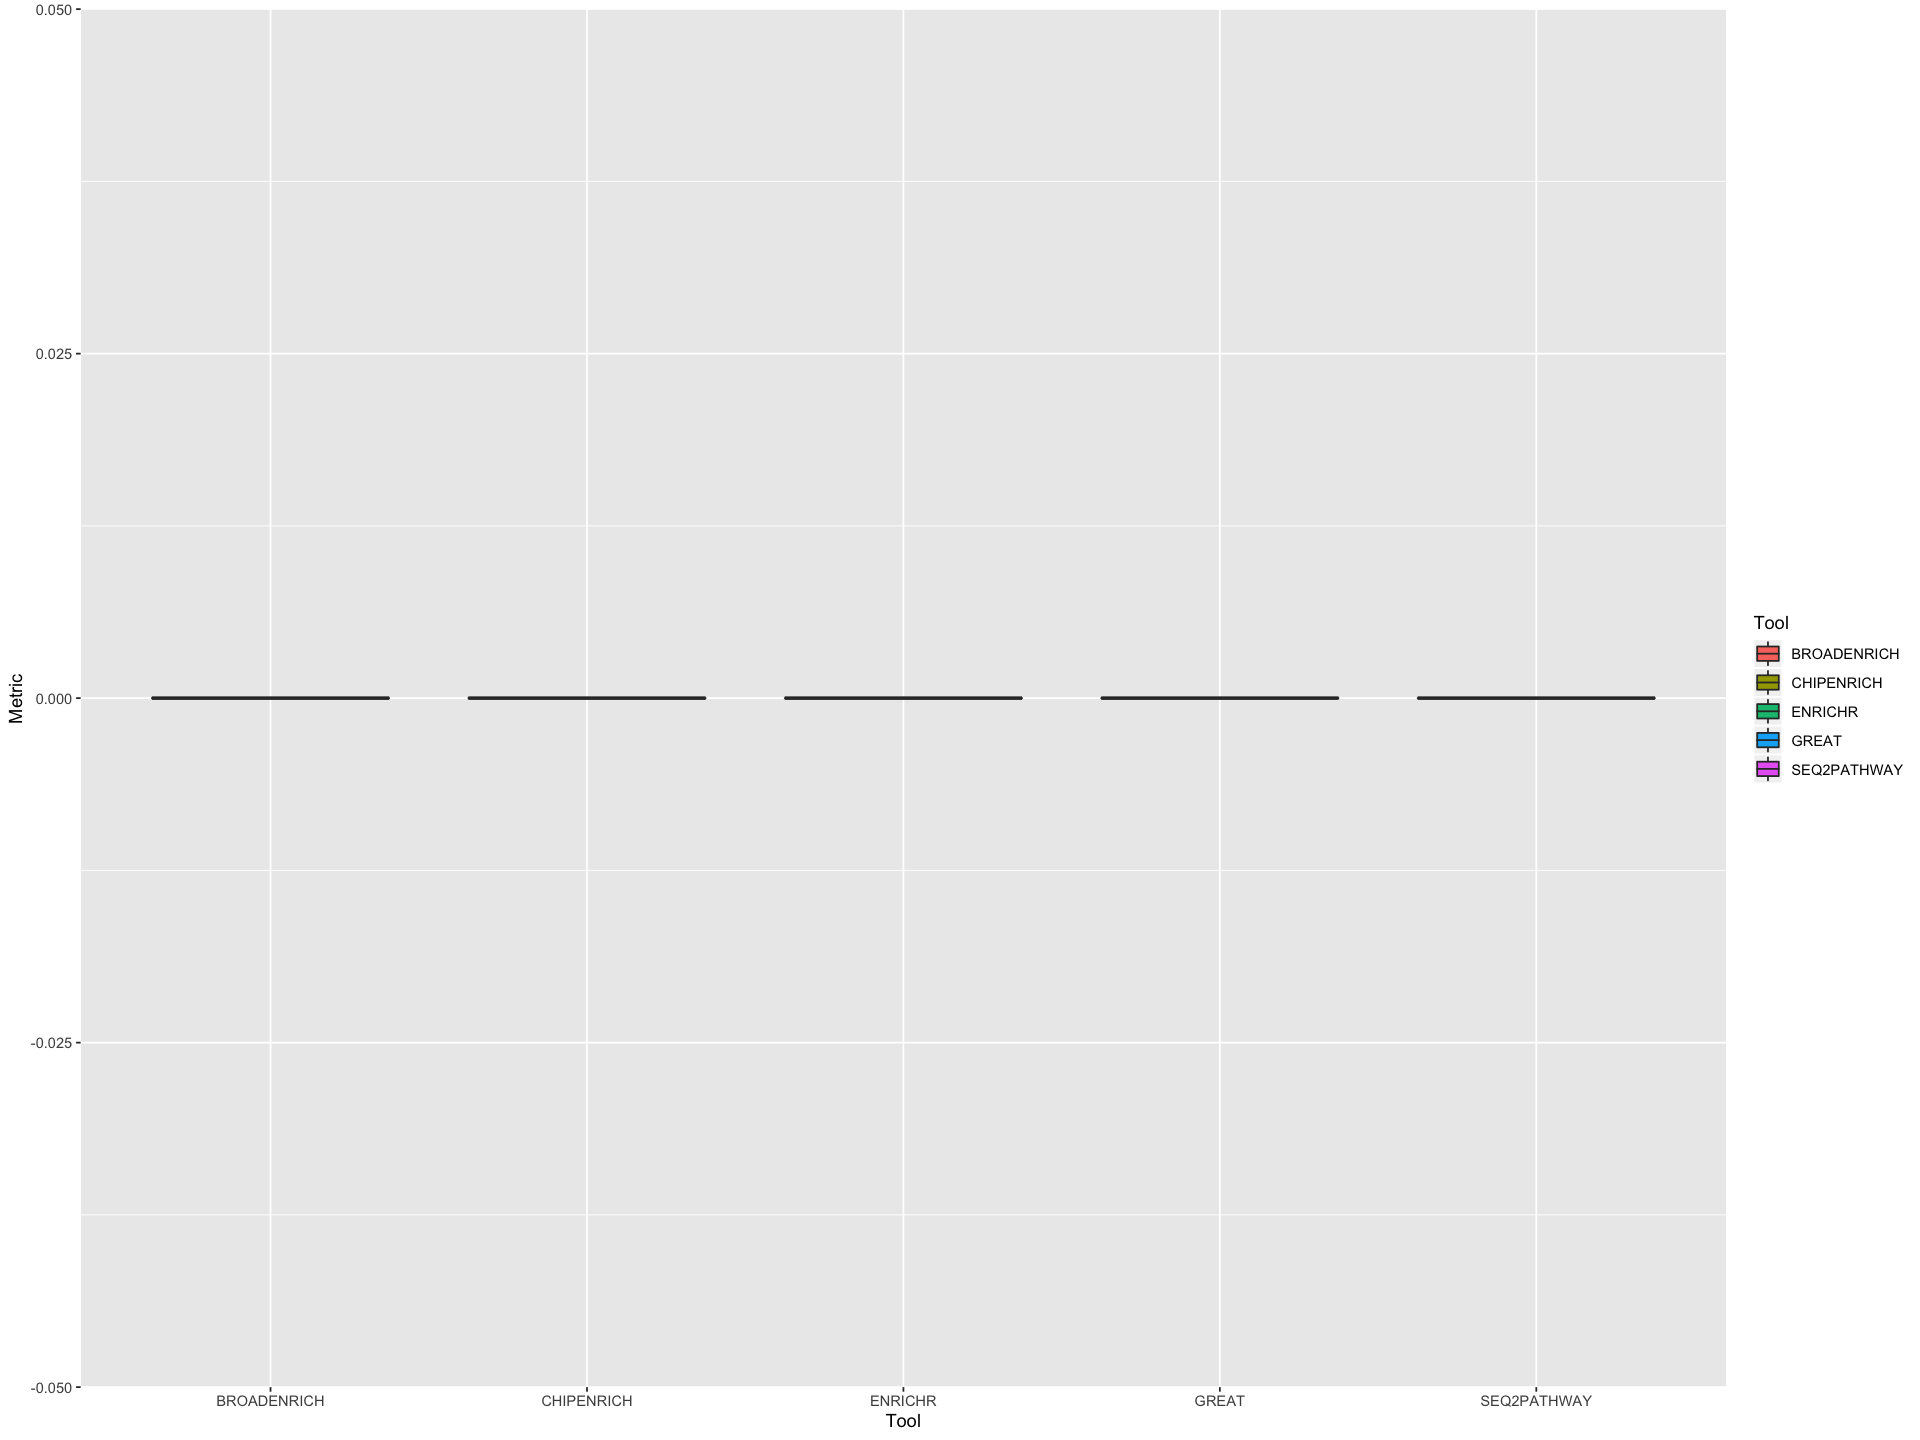

In [29]:
source("../protocolFunctions/plotMetrics.R") ## Function to plot comparison metrics
plotMetrics(plotPrioritization)

In [30]:
## Let's assemble a master list holding outputs from the said function.

source("../protocolFunctions/calculateSensitivitySpecificityPrecision.R")
resultsSensitivitySpecifictyPrecision <- lapply(1:length(toolsResults), calculateSensitivitySpecificityPrecision)

In [31]:
resultsSensitivitySpecifictyPrecision

colorectalCancerPool,alzheimersDiseasePool,gastricCancerPool,prostateCancerPool,Median,Samples
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0,0,0,0,0,forFalseNegatives_GSE84618_1
0,0,0,0,0,forFalseNegatives_GSE84618_2
0,0,0,0,0,forFalseNegatives_GSE84618_3
0,0,0,0,0,forFalseNegatives_GSE84618_4
0,0,0,0,0,forFalseNegatives_GSE84618_5
0,0,0,0,0,forFalsePositives_GSE84618_1
0,0,0,0,0,forFalsePositives_GSE84618_2
0,0,0,0,0,forFalsePositives_GSE84618_3
0,0,0,0,0,forFalsePositives_GSE84618_4


In [32]:
consolidatedSensitivity <- vector("list", length(toolsResults))
consolidatedSpecificity<- vector("list", length(toolsResults))
consolidatedPrecision <- vector("list", length(toolsResults))

for(i in 1: length(toolsResults)){ consolidatedSensitivity[[i]] <- append(consolidatedSensitivity[[i]],(resultsSensitivitySpecifictyPrecision[[i]][[1]]))}
for(i in 1: length(toolsResults)){ consolidatedSpecificity[[i]] <- append(consolidatedSpecificity[[i]],(resultsSensitivitySpecifictyPrecision[[i]][[2]]))}
for(i in 1: length(toolsResults)){ consolidatedPrecision[[i]] <- append(consolidatedPrecision[[i]],(resultsSensitivitySpecifictyPrecision[[i]][[3]]))}

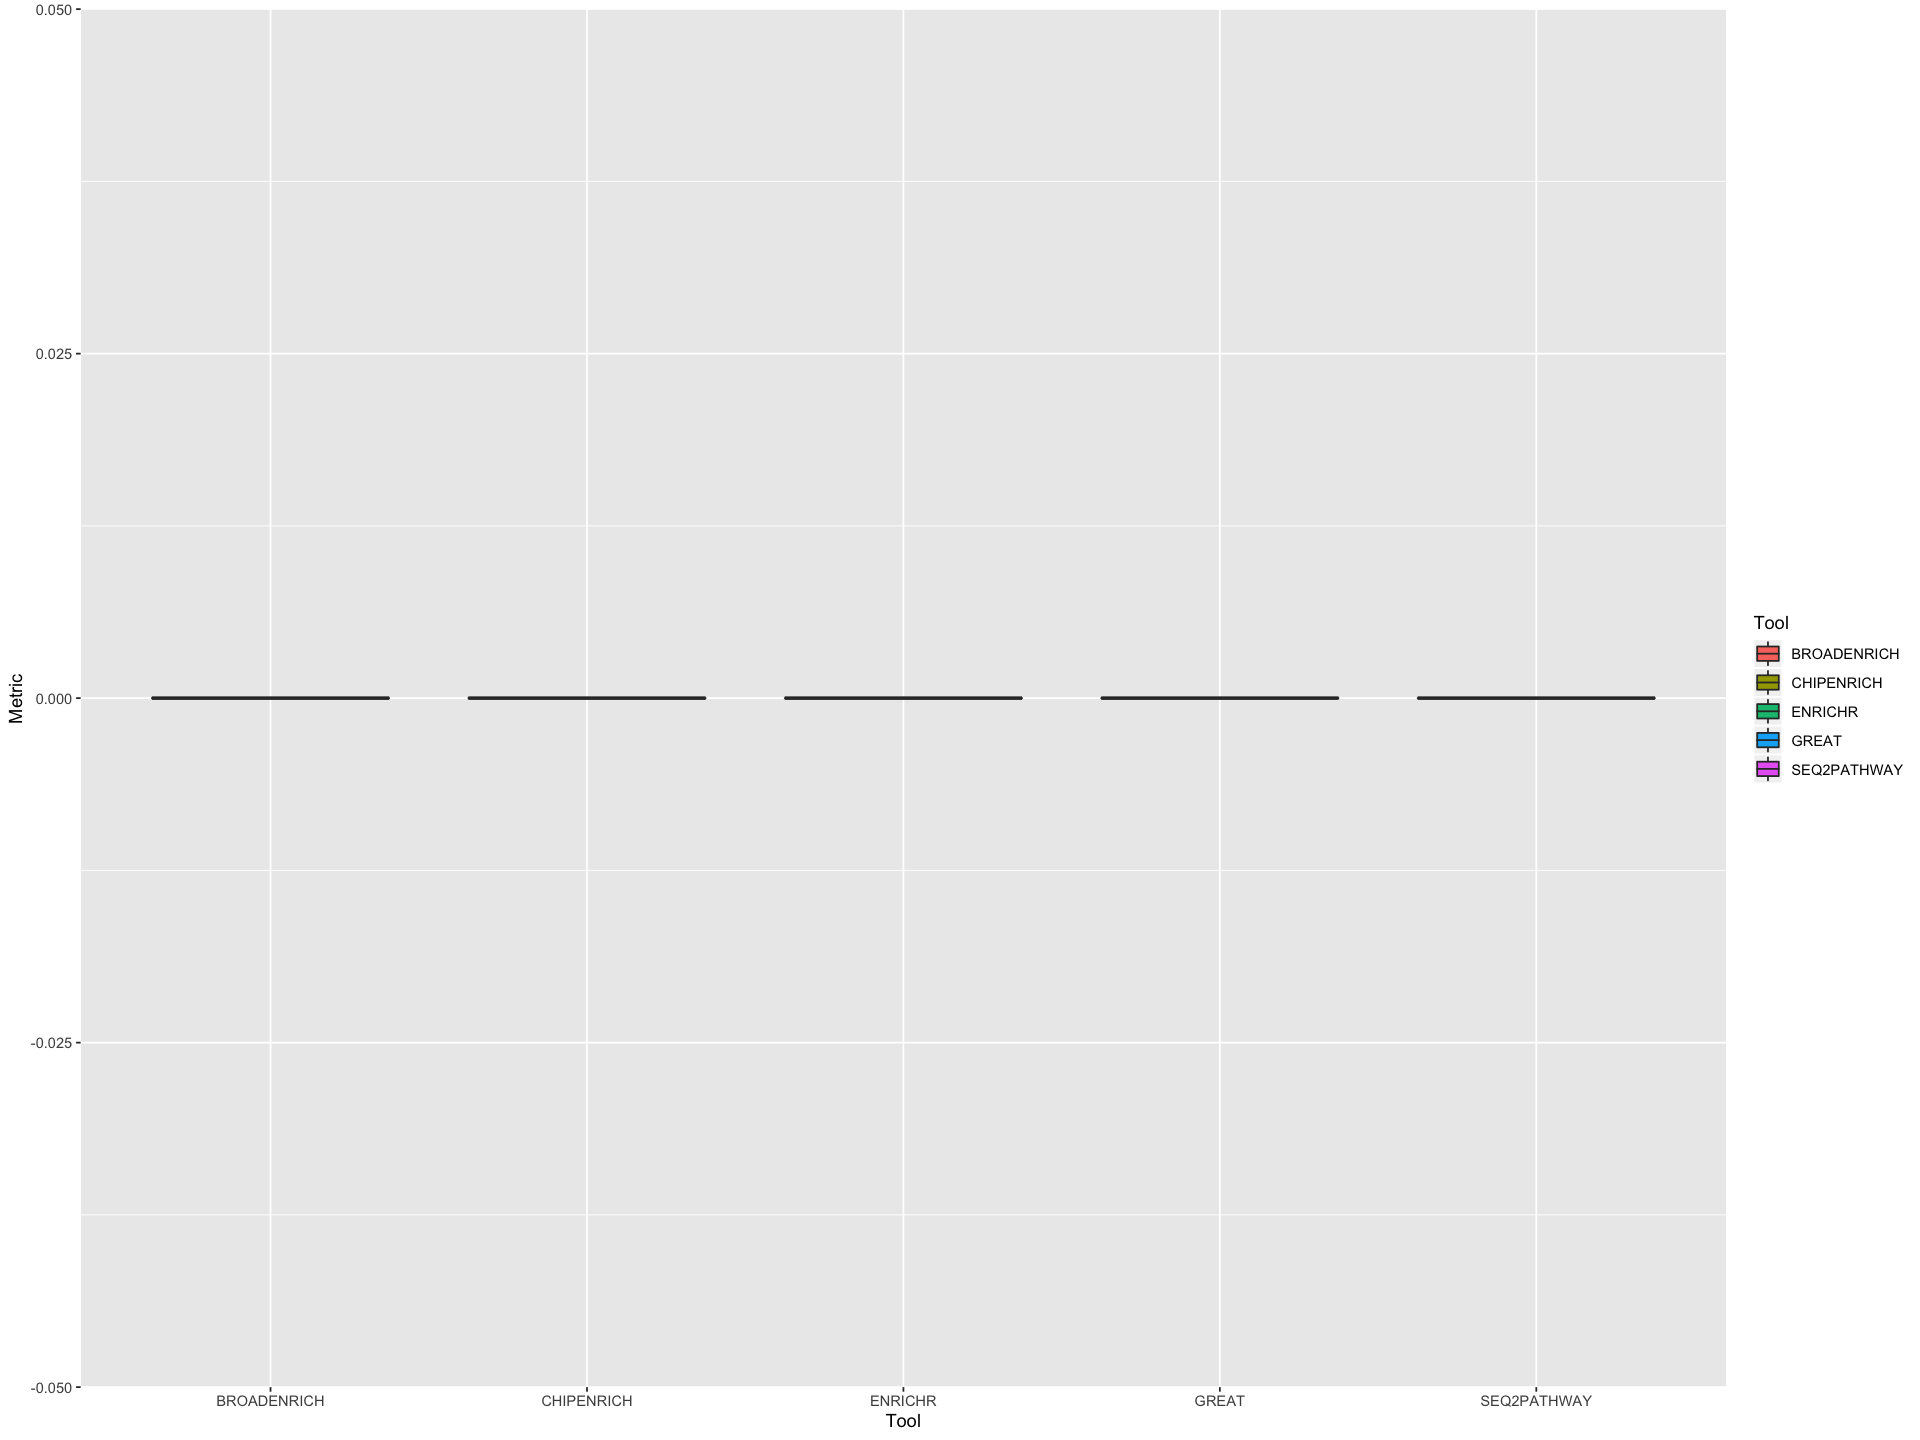

In [33]:
## Calling intermediary functions

source("../protocolFunctions/frameMe.R") ## This function regularizes the format of data for plotting.
source("../protocolFunctions/plotMetrics.R") ## Generates ggplots.

## Sensitivity

names(consolidatedSensitivity) <- toolsResults
consolidatedSensitivity <- lapply(consolidatedSensitivity, function(x) as.data.frame(x))
plotSensitivity <- frameMe(consolidatedSensitivity)
plotMetrics(plotSensitivity)

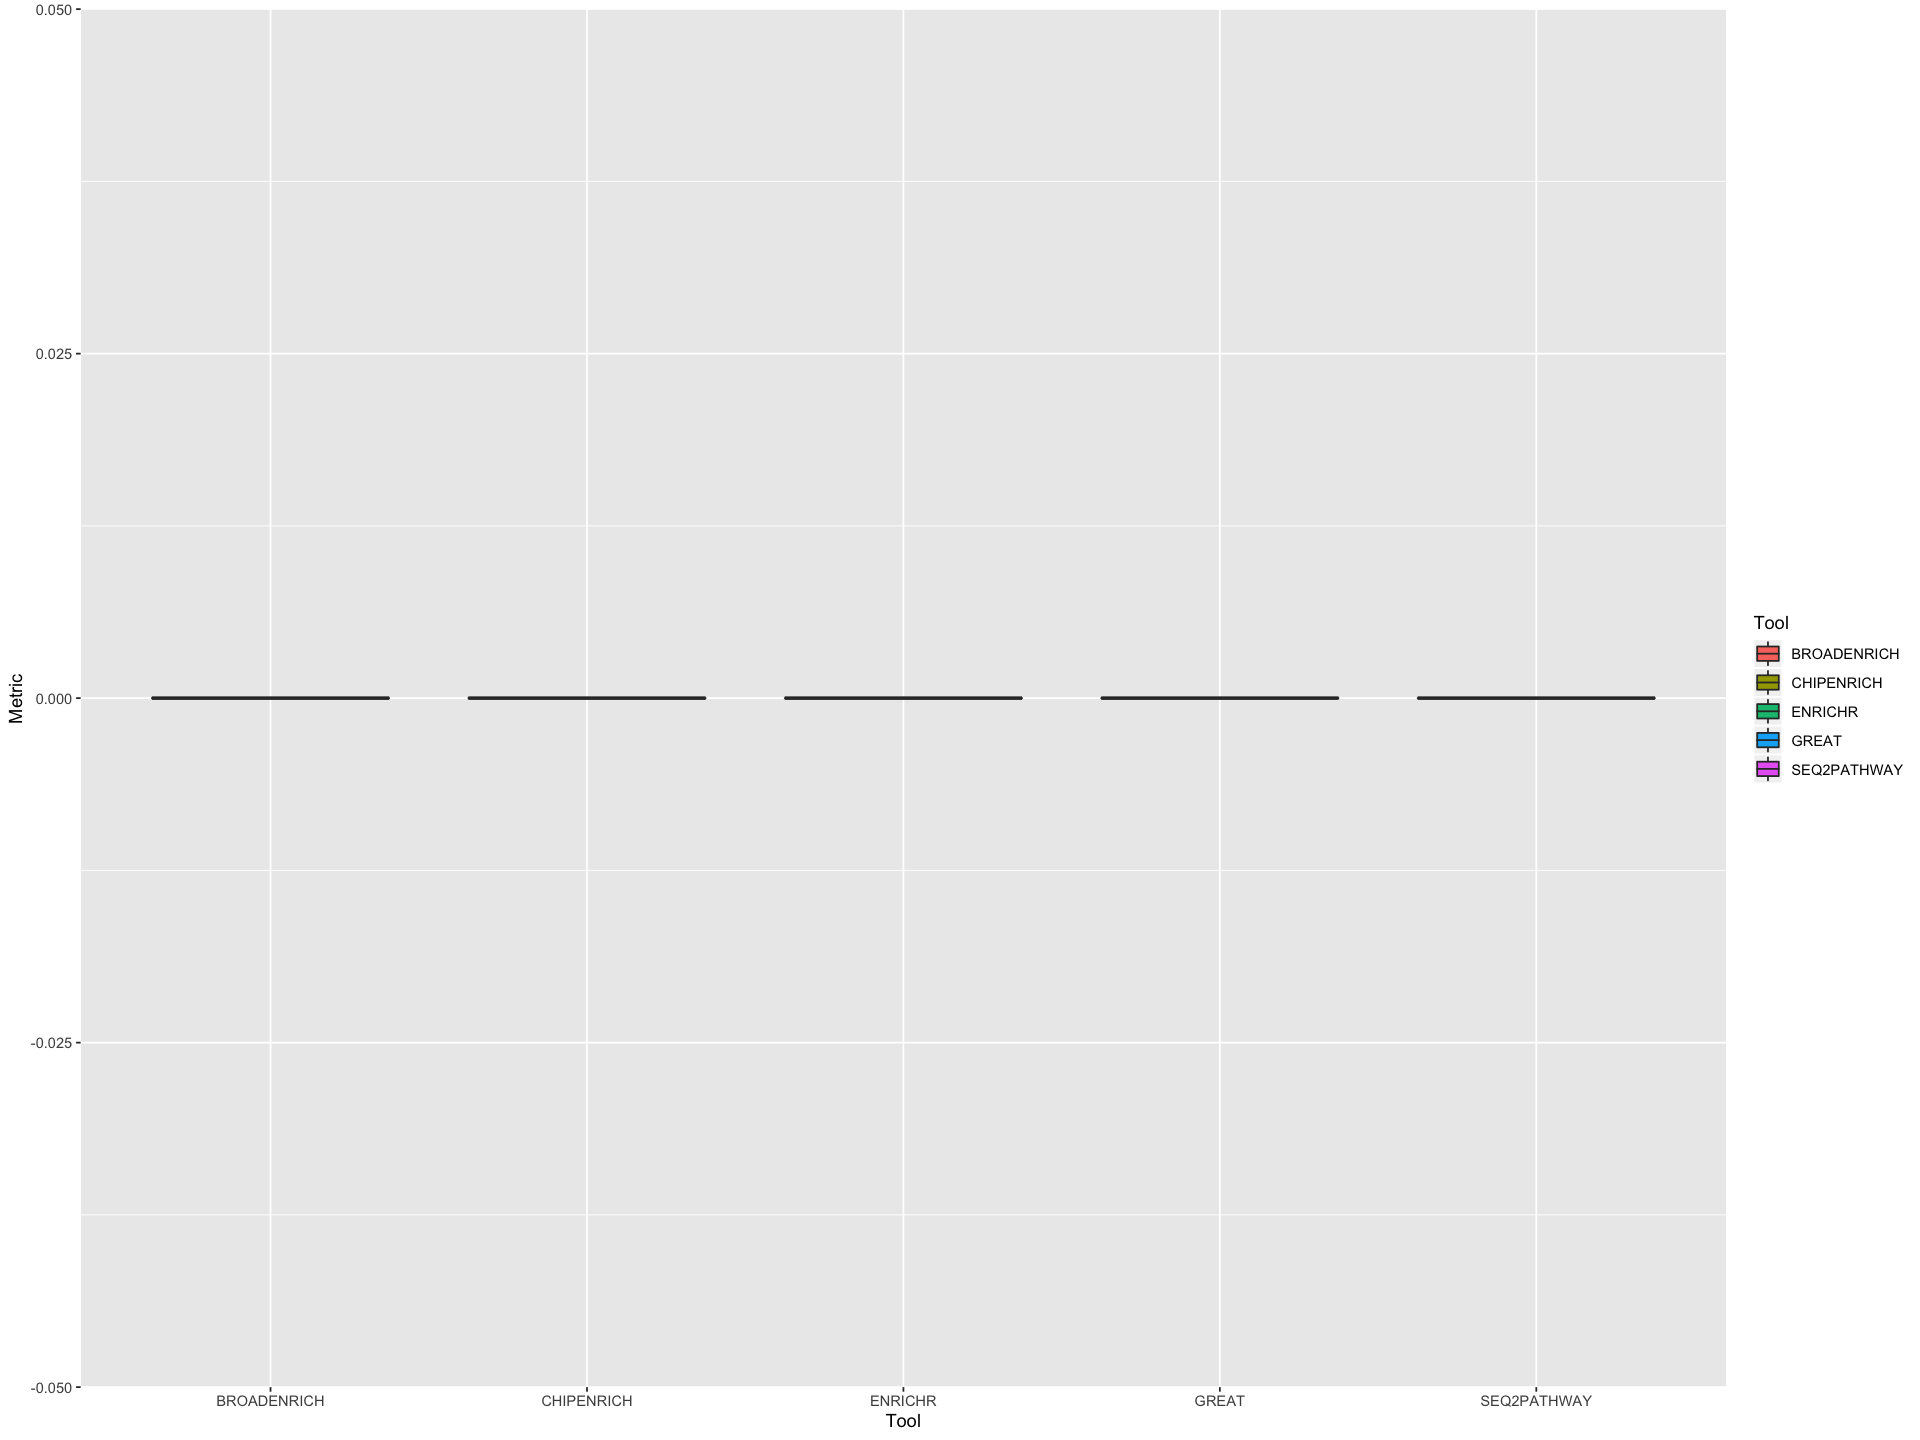

In [34]:
## Specificity

names(consolidatedSpecificity) <- toolsResults
consolidatedSpecificity <- lapply(consolidatedSpecificity, function(x) as.data.frame(x))
plotSpecificity <- frameMe(consolidatedSpecificity)
plotMetrics(plotSpecificity)

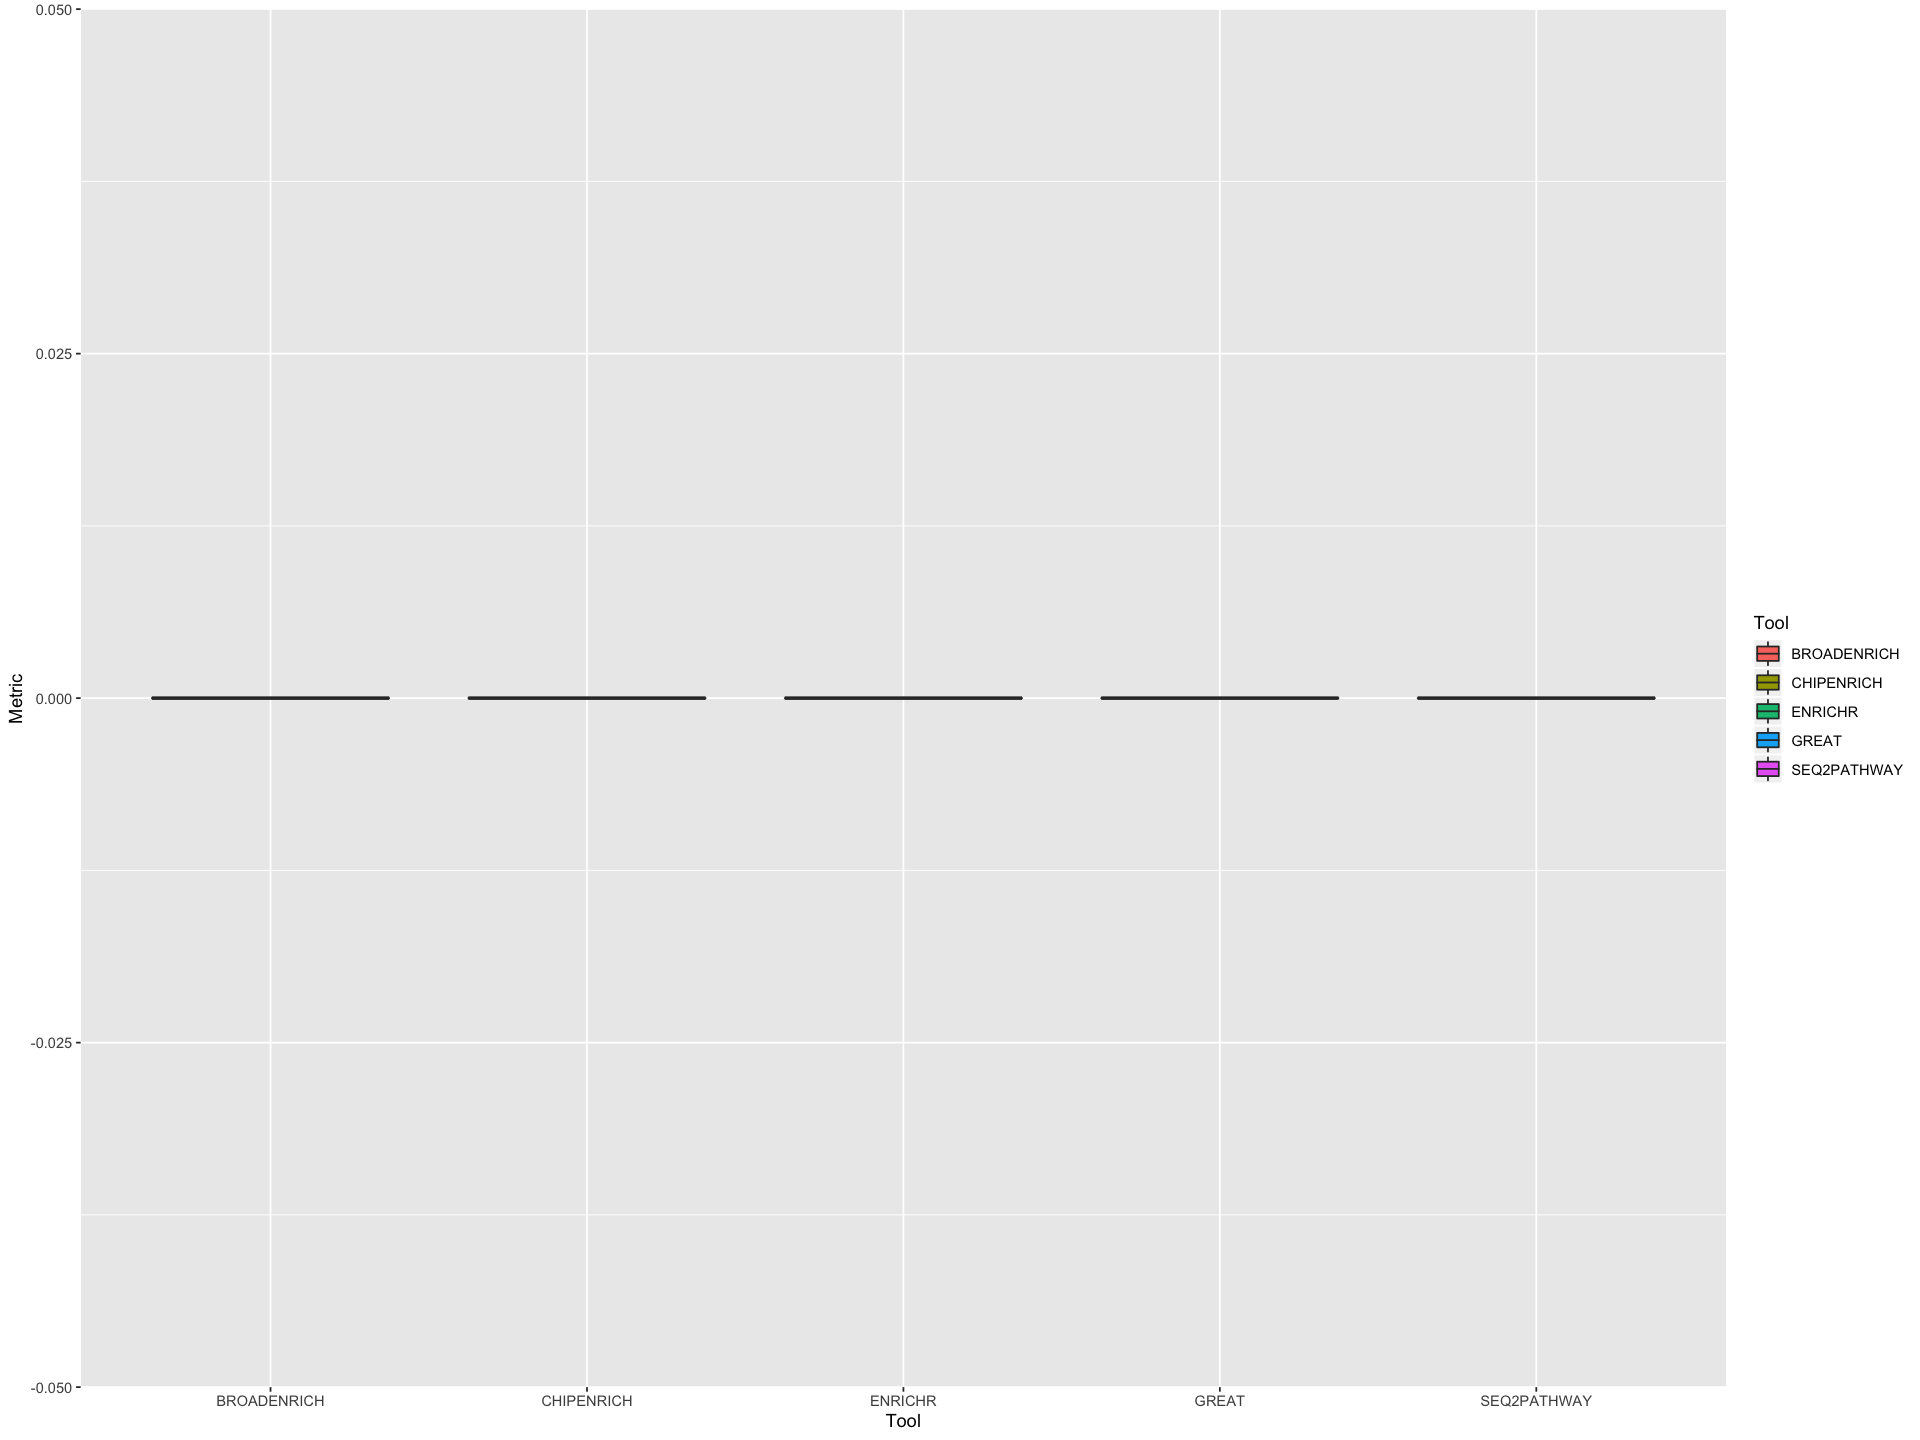

In [35]:
## Precision

names(consolidatedPrecision) <- toolsResults
consolidatedPrecision <- lapply(consolidatedPrecision, function(x) as.data.frame(x))
plotPrecision <- frameMe(consolidatedPrecision)
plotMetrics(plotPrecision)

In [28]:
sessionInfo()

R version 4.0.0 (2020-04-24)
Platform: x86_64-apple-darwin17.0 (64-bit)
Running under: macOS Catalina 10.15.5

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/4.0/Resources/lib/libRblas.dylib
LAPACK: /Library/Frameworks/R.framework/Versions/4.0/Resources/lib/libRlapack.dylib

locale:
[1] C/UTF-8/C/C/C/C

attached base packages:
[1] parallel  stats4    stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] ggplot2_3.3.0        tidyr_1.0.3          dplyr_0.8.5         
 [4] hash_2.2.6.1         stringr_1.4.0        GenomicRanges_1.40.0
 [7] GenomeInfoDb_1.24.0  IRanges_2.22.1       S4Vectors_0.26.0    
[10] BiocGenerics_0.34.0  devtools_2.3.0       usethis_1.6.1       
[13] chipenrich_2.12.0    seq2pathway_1.20.0  

loaded via a namespace (and not attached):
  [1] uuid_0.1-4                  backports_1.1.6            
  [3] Hmisc_4.4-0                 BiocFileCache_1.12.0       
  [5] plyr_1.8.6                 